In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Installing researchpy library
!pip install researchpy

In [3]:
# Importing the necessary libraries
import pandas as pd # for reading and manipulating dataframes
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for building visualizations
import seaborn as sns # for building visualizations
import warnings

In [4]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# Saving `Id` column of the test set in a list
id_column = list(test['Id'])
# Dropping the `Id` column
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [8]:
# Extracting numerical features
train_num = train.select_dtypes(include='number')
test_num = test.select_dtypes(include='number')

train_num.info()
test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

# Numerical Data Exploration

**Data Distribution**

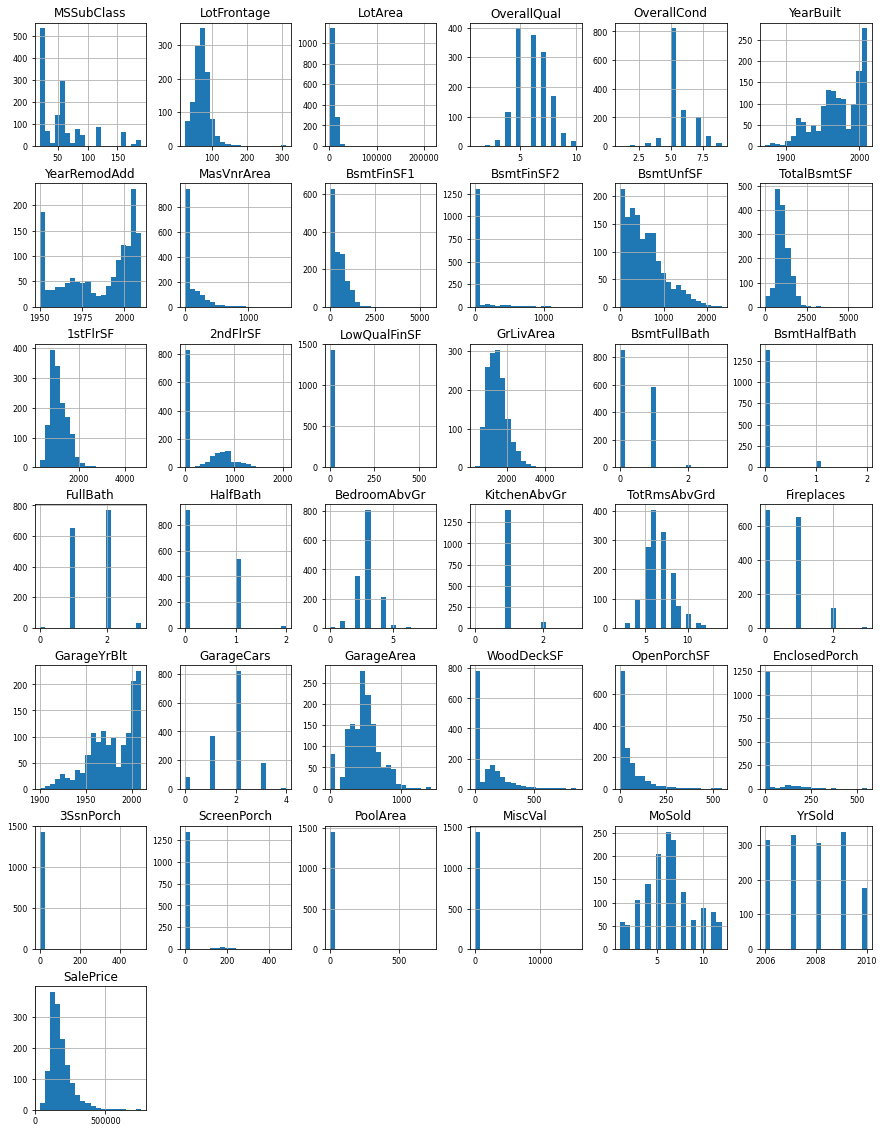

In [9]:
# Figure out the distribution of training set features
train_num.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

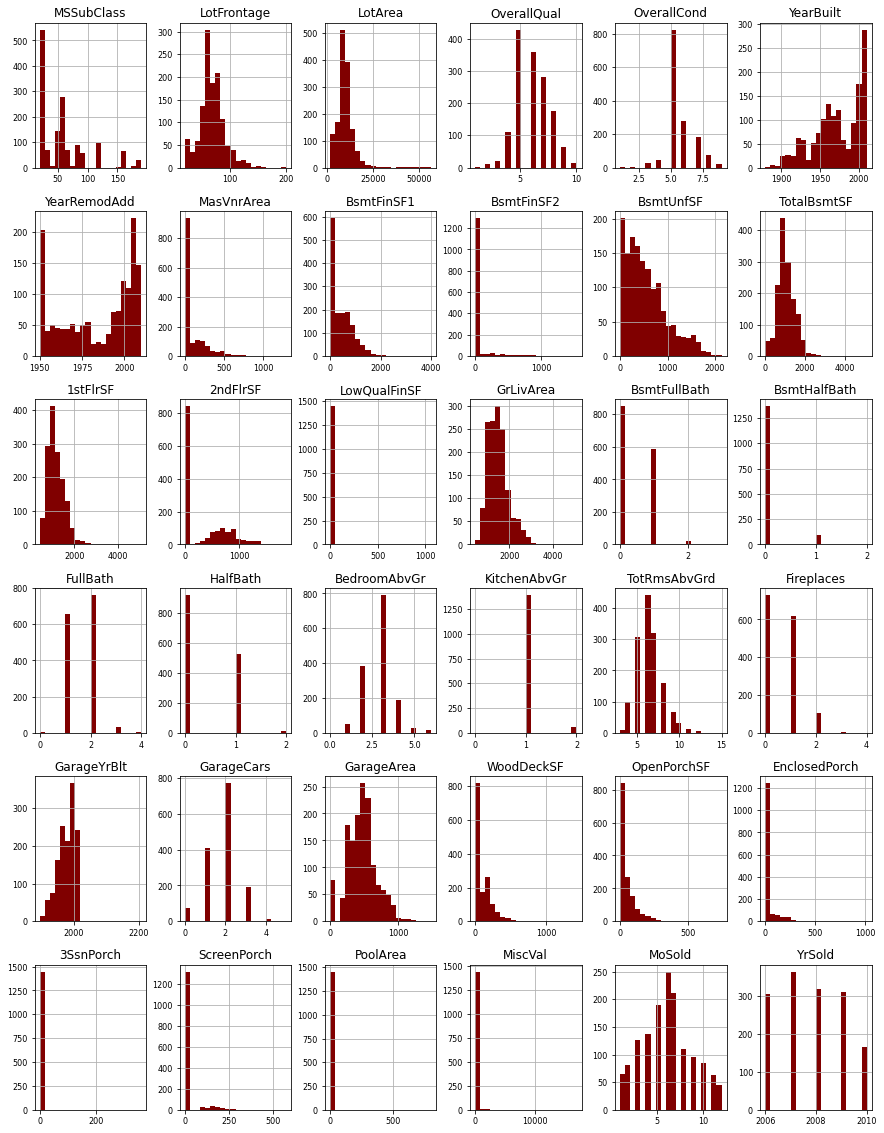

In [10]:
# Figure out the distribution of testing set features
test_num.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8, color='maroon')

plt.show()

**Feature Selection**

Finding Constant feature and removing it

In [11]:
# Detection of constant and quasi-constant features
from sklearn.feature_selection import VarianceThreshold

# Find the constant variance features
sel_const = VarianceThreshold(threshold=0)
# Find the quasi-constant variance features (with 95% of the same data)
sel_qsi_const = VarianceThreshold(threshold=0.05)

sel_const.fit(train_num)
sel_qsi_const.fit(train_num)

# Get the retained features from the feature selection process
ret_const = sel_const.get_support()
ret_qsi_const = sel_qsi_const.get_support()

# Return the columns that did not meet the threshold
const_columns = [col for col in train_num.columns if col not in\
               train_num.columns[ret_const]]
qsi_const_columns = [col for col in train_num.columns if col not\
                     in train_num.columns[ret_qsi_const]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns}")

Number of features that are retained after constant variance check: 37
Number of features that are retained after quasi_constant variance check: 36
The variables that have about 95% of constant values are: ['KitchenAbvGr']


In [12]:
sel_const.fit(test_num)
sel_qsi_const.fit(test_num)

# Get the retained features from the feature selection process
ret_const_test = sel_const.get_support()
ret_qsi_const_test = sel_qsi_const.get_support()

# Return the columns that did not meet the threshold
const_columns_test = [col for col in test_num.columns if col not in\
               test_num.columns[ret_const_test]]
qsi_const_columns_test = [col for col in test_num.columns if col not\
                     in test_num.columns[ret_qsi_const_test]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const_test)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const_test)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns_test}")

Number of features that are retained after constant variance check: 36
Number of features that are retained after quasi_constant variance check: 35
The variables that have about 95% of constant values are: ['KitchenAbvGr']


Feature using Correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


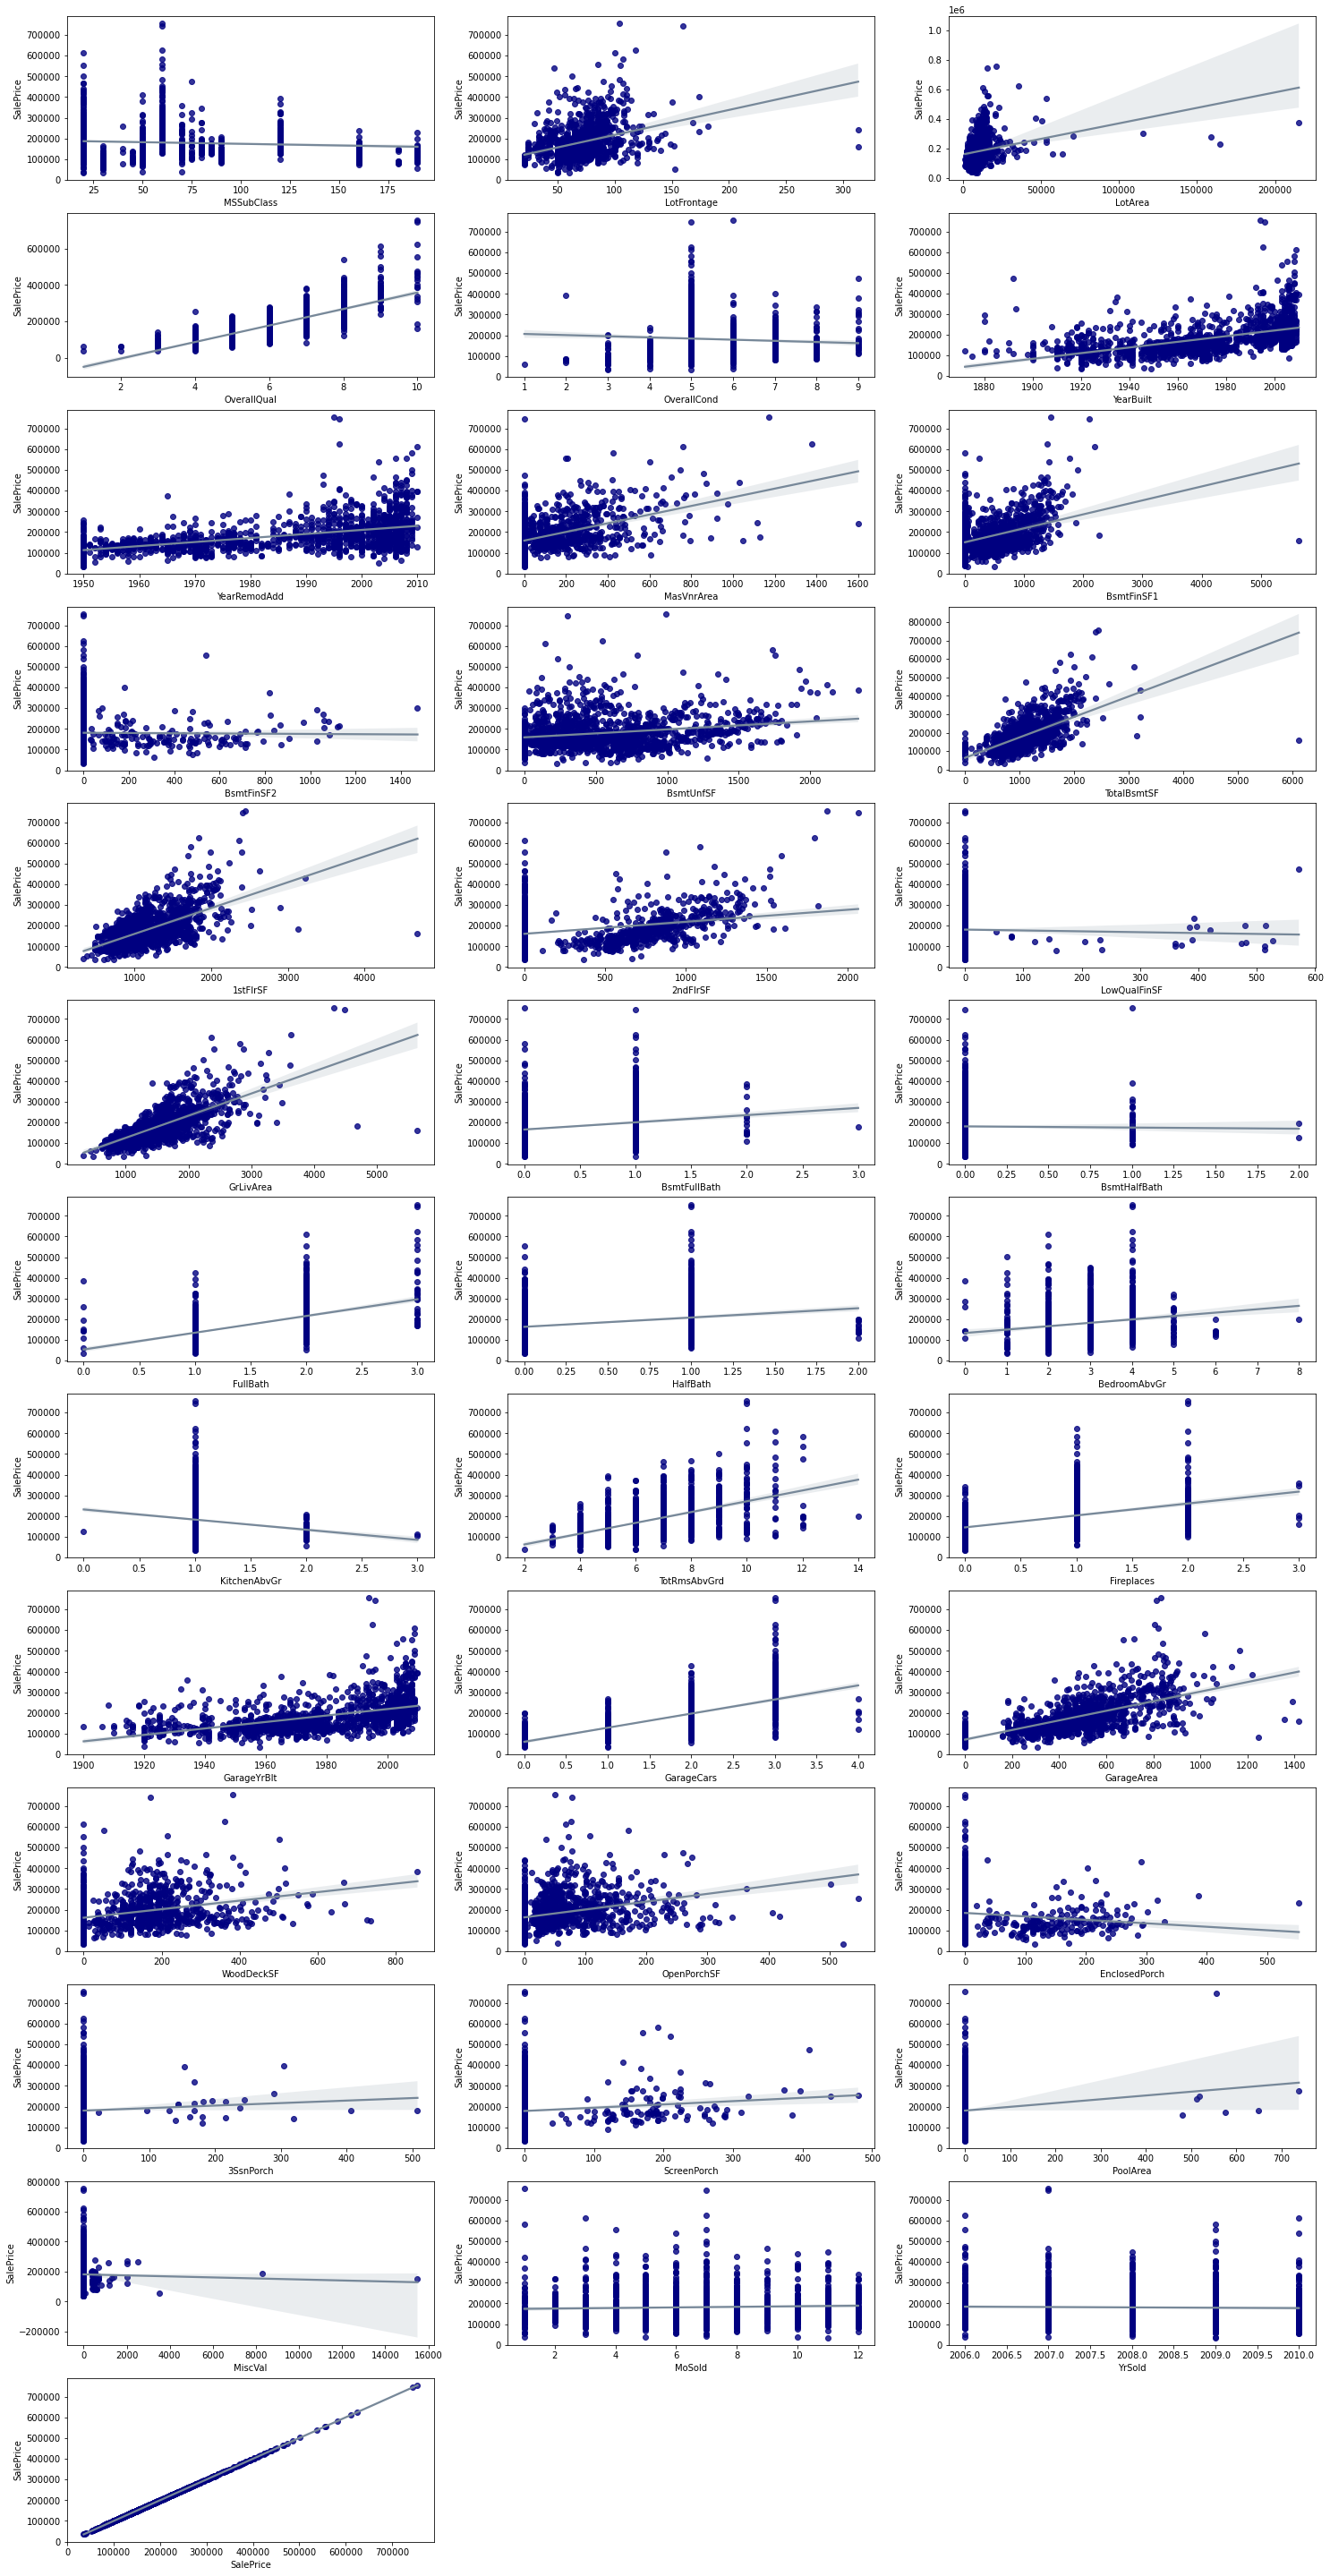

In [13]:
# Figure out the correlation among variables
count=1
plt.subplots(figsize=(25, 60))
for i in train_num.columns:
    plt.subplot(15,3,count)
    sns.regplot(train_num[i],train_num['SalePrice'],\
               scatter_kws={'color':'navy'},\
               line_kws={'color': 'lightslategrey'})
    count+=1

plt.show()

Correlation matrix based feature selection

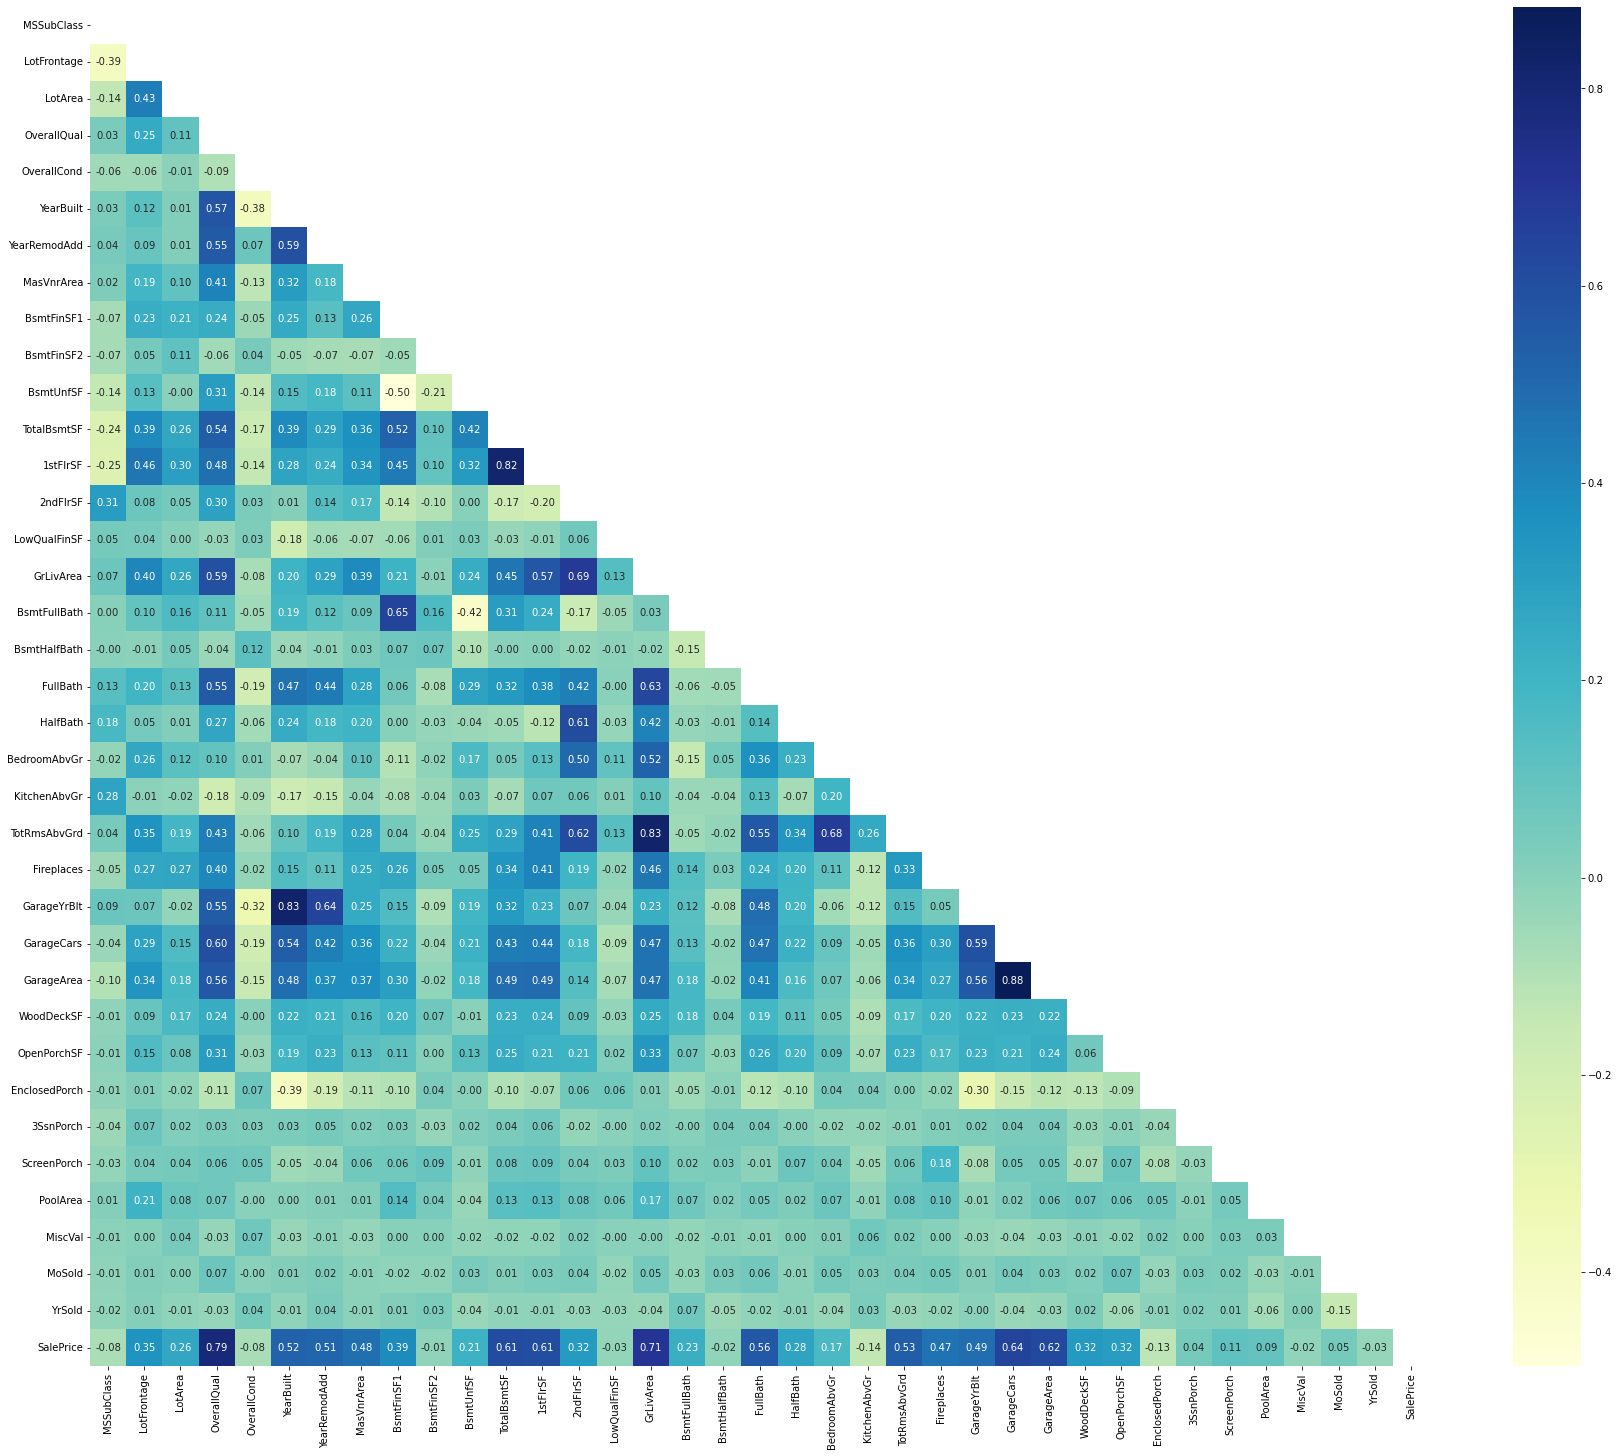

In [14]:
# Modifying the figure size
plt.figure(figsize=(30,25))
# Calculation of correlation among variables
corr_matrix = train_num.corr()
# Masking the upper triangle for the heatmap since it shows the same values of correlation
mask_upp = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plotting correlation heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True, fmt='.2f',\
            mask = mask_upp)
  
# displaying heatmap
plt.show()

In [15]:
# Highly correlated features with other features (Multicollinear features)
multicol_features = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
# Dropping the multicolinear features
train_num = train_num.drop(multicol_features, axis = 1)
test_num =  test_num.drop(multicol_features, axis = 1)

In [16]:
df_num_corr = train_num.corr()["SalePrice"][:-1]
strong_features = list(abs(df_num_corr[df_num_corr >= 0.7]).index)
moderate_features = list(abs(df_num_corr[(df_num_corr >= 0.4) & (df_num_corr < 0.7)]).index)
weak_features = list(abs(df_num_corr[(df_num_corr >= 0.1) &\
                        (df_num_corr < 0.4)]).index)

list_keep = strong_features + weak_features + moderate_features
list_keep.append('SalePrice')

train_num = train_num.loc[:,list_keep]
test_num = test_num.loc[:,list_keep[:-1]]

In [17]:
train_num

,OverallQual,GrLivArea,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,...,OpenPorchSF,ScreenPorch,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,SalePrice
0,7,1710,65.0,8450,706,150,854,1,1,3,...,61,0,2003,2003,196.0,856,2,0,2,208500
1,6,1262,80.0,9600,978,284,0,0,0,3,...,0,0,1976,1976,0.0,1262,2,1,2,181500
2,7,1786,68.0,11250,486,434,866,1,1,3,...,42,0,2001,2002,162.0,920,2,1,2,223500
3,7,1717,60.0,9550,216,540,756,1,0,3,...,35,0,1915,1970,0.0,756,1,1,3,140000
4,8,2198,84.0,14260,655,490,1053,1,1,4,...,84,0,2000,2000,350.0,1145,2,1,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,62.0,7917,0,953,694,0,1,3,...,40,0,1999,2000,0.0,953,2,1,2,175000
1456,6,2073,85.0,13175,790,589,0,1,0,3,...,0,0,1978,1988,119.0,1542,2,2,2,210000
1457,7,2340,66.0,9042,275,877,1152,0,0,4,...,60,0,1941,2006,0.0,1152,2,2,1,266500
1458,5,1078,68.0,9717,49,0,0,1,0,2,...,0,0,1950,1996,0.0,1078,1,0,1,142125


In [18]:
col_nan_train = train_num.loc[:, train_num.isnull().any()].columns
col_nan_test = test_num.loc[:, test_num.isnull().any()].columns

print(col_nan_train)
print(col_nan_test)

Index(['LotFrontage', 'MasVnrArea'], dtype='object')
Index(['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'MasVnrArea',
       'TotalBsmtSF', 'GarageCars'],
      dtype='object')


**Missing Values Handling**

       columns  percent_nan
0  LotFrontage        17.74
1   MasVnrArea         0.55


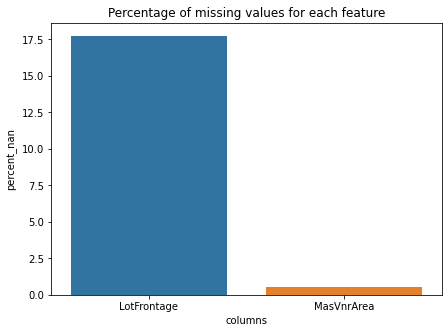

In [19]:
# Building a dataframe for featues with missing values
cols_train = []
percent_nan_train = []

for i in col_nan_train:
    cols_train.append(i)
    percent_nan_train.append(round(train_num[i].isnull().sum() * 100 /\
                       len(train_num), 2))

missing_df_train = pd.DataFrame(np.array(cols_train),\
                                columns=["columns"])
missing_df_train['percent_nan'] = np.array(percent_nan_train)
print(missing_df_train)
# Visualizing the NaN values 
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_train, x='columns', y = 'percent_nan')
plt.title('Percentage of missing values for each feature')
plt.show()

        columns  percent_nan
0   LotFrontage        15.56
1    BsmtFinSF1         0.07
2     BsmtUnfSF         0.07
3  BsmtFullBath         0.14
4    MasVnrArea         1.03
5   TotalBsmtSF         0.07
6    GarageCars         0.07


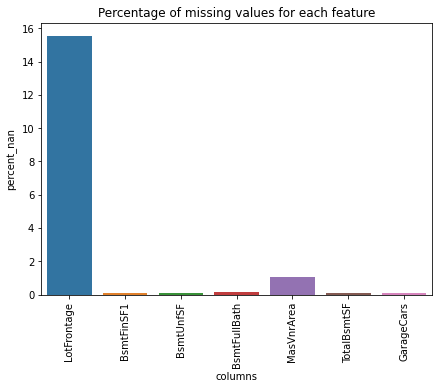

In [20]:
cols_test = []
percent_nan_test = []

for i in col_nan_test:
    cols_test.append(i)
    percent_nan_test.append(round(test_num[i].isnull().sum() * 100 /len(test_num), 2))
    
missing_df_test = pd.DataFrame(np.array(cols_test),\
                                columns=["columns"])
missing_df_test['percent_nan'] = np.array(percent_nan_test)

print(missing_df_test)
# Visualizing the NaN values
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_test, x='columns', y = 'percent_nan')
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation = 90)
plt.show()

In [21]:
# Importing the library for imputation method
from sklearn.impute import SimpleImputer
# Initiating the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
list_missing_train = ['LotFrontage', 'MasVnrArea']
# Filling the missing values with the median of the column
df_train_impute = pd.DataFrame(imputer.fit_transform(train_num),\
                              columns = train_num.columns)

In [22]:
# Filling the missing values with the median of the column
list_missing_test = ['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath','MasVnrArea', 'TotalBsmtSF', 'GarageCars']
df_test_impute = pd.DataFrame(imputer.fit_transform(test_num),\
                              columns = test_num.columns)

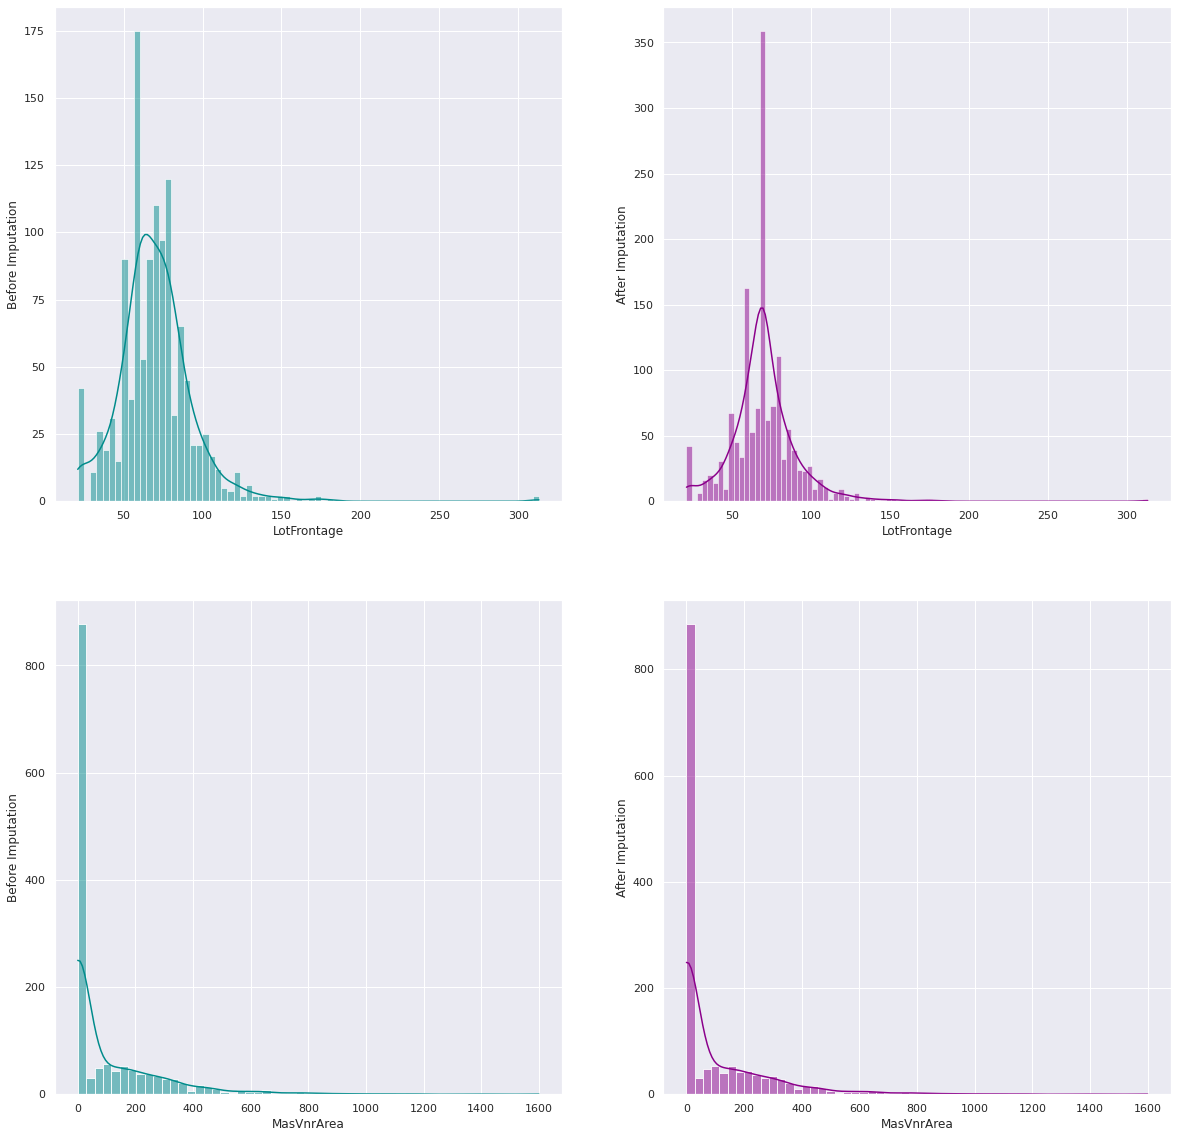

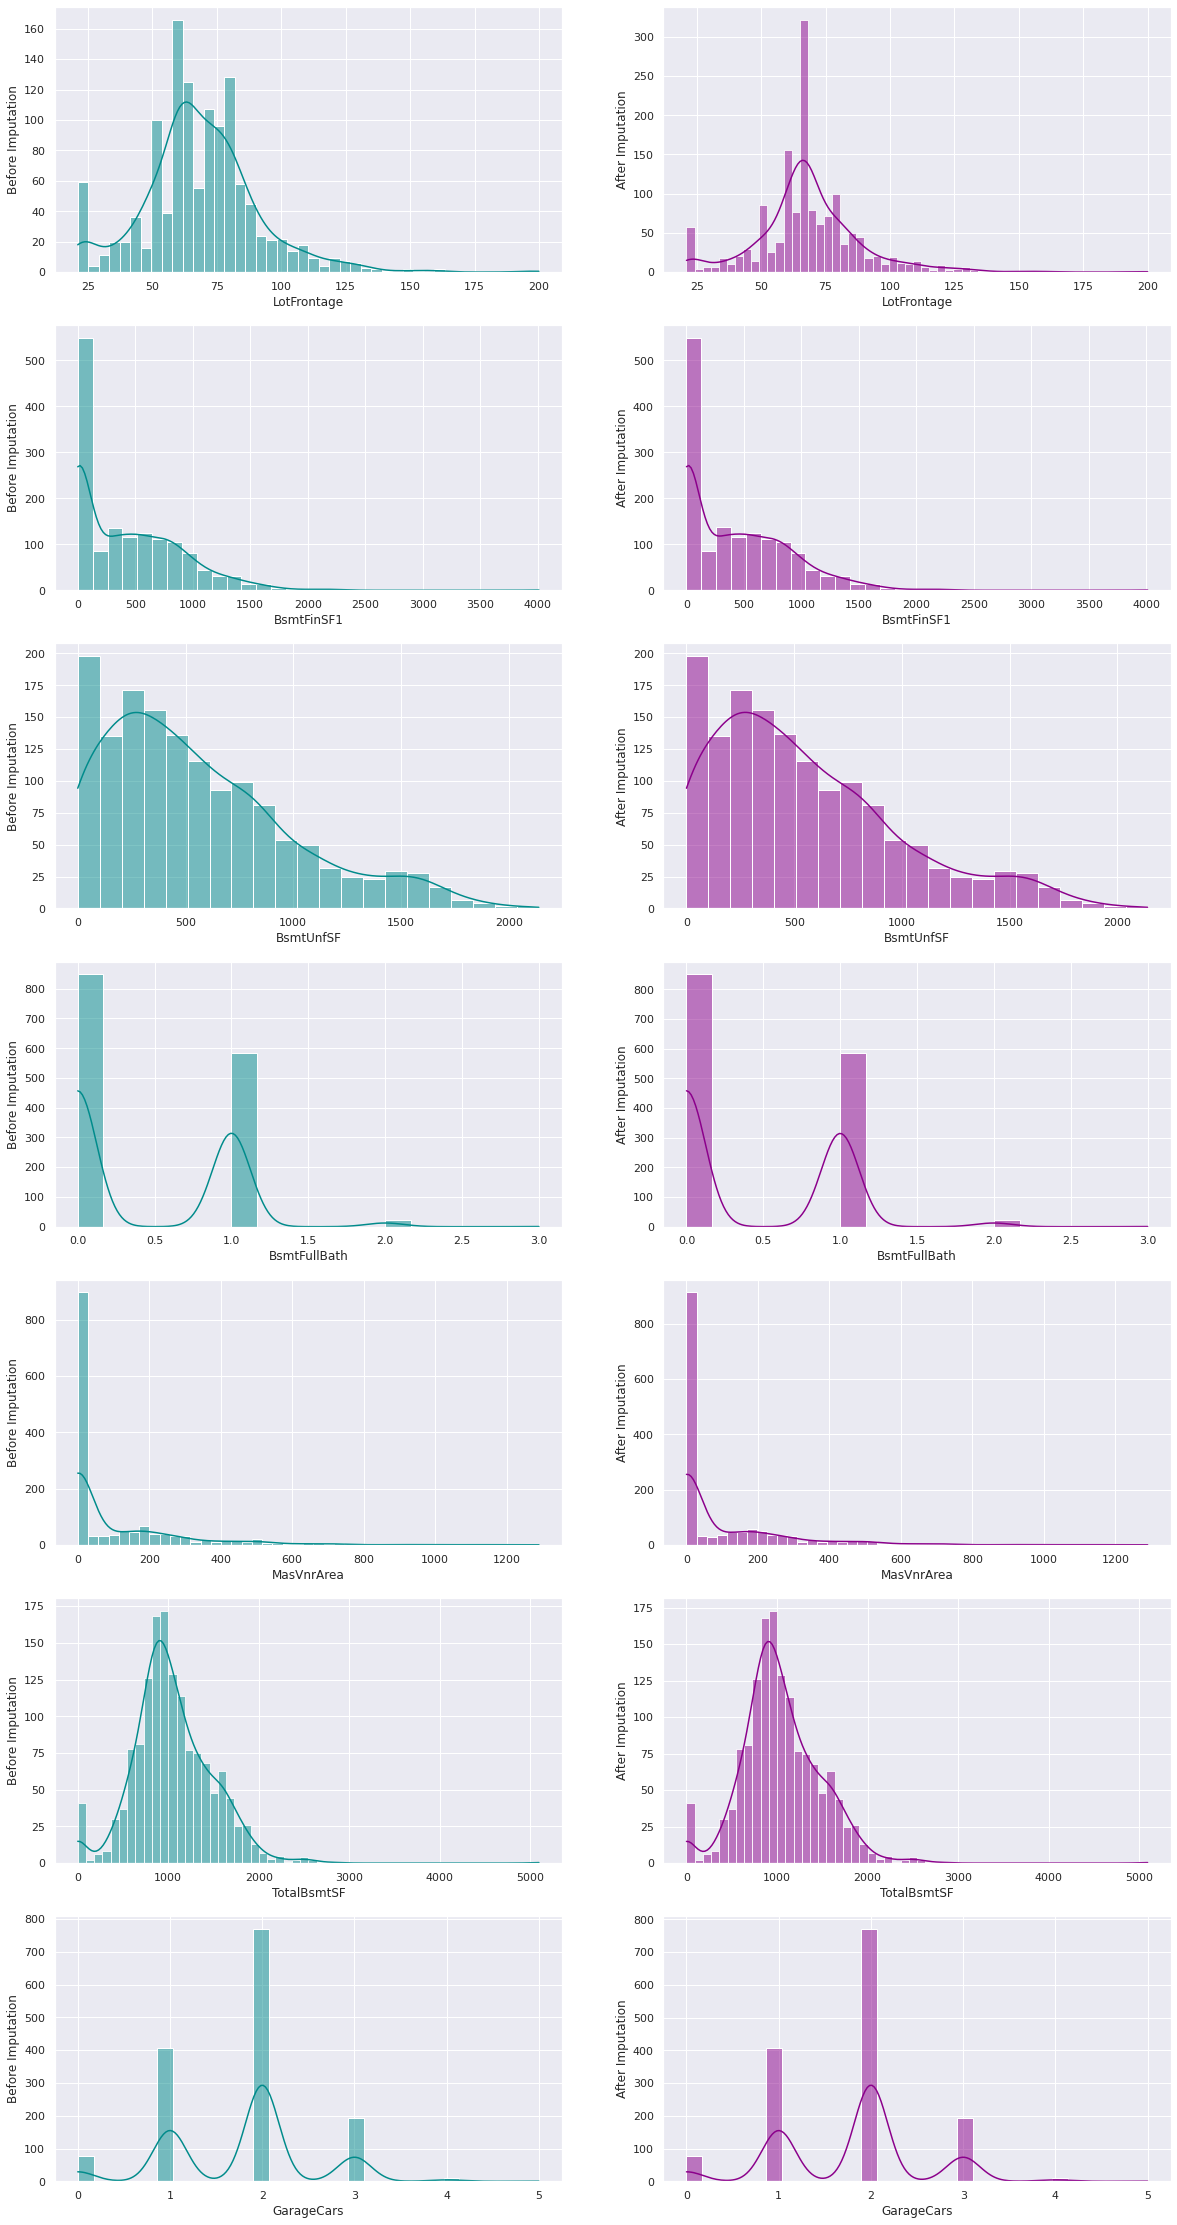

In [23]:
# Visualizing the distribution before and after imputation
sns.set(rc={"figure.figsize":(20, 20)})
fig, axes = plt.subplots(2, 2)
for col, fig_row in zip(list_missing_train,[0, 1]):
    before_impute = sns.histplot(ax=axes[fig_row,0],\
                                 x=train_num[col],\
                                 kde=True, color='darkcyan')
    before_impute.set(ylabel='Before Imputation')
    after_impute = sns.histplot(ax=axes[fig_row,1],\
                                 x=df_train_impute[col],\
                                 kde=True, color='darkmagenta')
    after_impute.set(ylabel='After Imputation')
# Visualizing the distribution before and after imputation
sns.set(rc={"figure.figsize":(20, 40)})
fig, axes = plt.subplots(7, 2)   
for col, fig_row in zip(list_missing_test,range(0, 7)):
    before_impute = sns.histplot(ax=axes[fig_row,0],\
                                 x=test_num[col],\
                                 kde=True, color='darkcyan')
    before_impute.set(ylabel='Before Imputation')
    after_impute = sns.histplot(ax=axes[fig_row,1],\
                                 x=df_test_impute[col],\
                                 kde=True, color='darkmagenta')
    after_impute.set(ylabel='After Imputation')

In [24]:
# Dropping the `LotFrontage` feature from both datasets as the imputation changed its distribution
df_train_impute.drop('LotFrontage', axis=1, inplace=True)
df_test_impute.drop('LotFrontage', axis=1, inplace=True)

# Categorical Data Exploration

In [25]:
# Selecting the categorical features
df_train_cat = train.select_dtypes('object')
df_test_cat = test.select_dtypes('object')
# Checking for the new dataframes
df_train_cat.info()
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

**Handling Missing Categorical Features**

In [26]:
# Demonstrate the features with missing values in both training and testing set
col_nan_train_cat = df_train_cat.loc[:, df_train_cat.isnull().any()].columns
col_nan_test_cat = df_test_cat.loc[:, df_test_cat.isnull().any()].columns

     columns_cat  percent_nan
0          Alley        93.77
1     MasVnrType         0.55
2       BsmtQual         2.53
3       BsmtCond         2.53
4   BsmtExposure         2.60
5   BsmtFinType1         2.53
6   BsmtFinType2         2.60
7     Electrical         0.07
8    FireplaceQu        47.26
9     GarageType         5.55
10  GarageFinish         5.55
11    GarageQual         5.55
12    GarageCond         5.55
13        PoolQC        99.52
14         Fence        80.75
15   MiscFeature        96.30


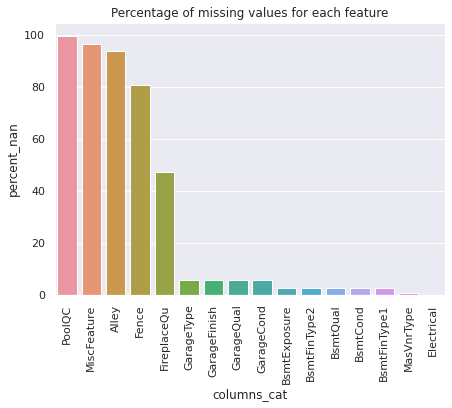

In [27]:
# Building a dataframe for featues with missing values
cols_train_cat = []
percent_nan_train_cat = []

for i in col_nan_train_cat:
    cols_train_cat.append(i)
    percent_nan_train_cat.append(round(df_train_cat[i].isnull().sum() * 100 /\
                       len(df_train_cat),2))

missing_df_train_cat = pd.DataFrame(np.array(cols_train_cat),\
                                columns=["columns_cat"])
missing_df_train_cat['percent_nan'] = np.array(percent_nan_train_cat)

print(missing_df_train_cat)

# Visualizing the NaN values
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_train_cat,\
            x='columns_cat', y = 'percent_nan',\
            order=missing_df_train_cat.sort_values('percent_nan',ascending=False).columns_cat)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation = 90)
plt.show()

     columns_cat  percent_nan
0       MSZoning         0.27
1          Alley        92.67
2      Utilities         0.14
3    Exterior1st         0.07
4    Exterior2nd         0.07
5     MasVnrType         1.10
6       BsmtQual         3.02
7       BsmtCond         3.08
8   BsmtExposure         3.02
9   BsmtFinType1         2.88
10  BsmtFinType2         2.88
11   KitchenQual         0.07
12    Functional         0.14
13   FireplaceQu        50.03
14    GarageType         5.21
15  GarageFinish         5.35
16    GarageQual         5.35
17    GarageCond         5.35
18        PoolQC        99.79
19         Fence        80.12
20   MiscFeature        96.50
21      SaleType         0.07


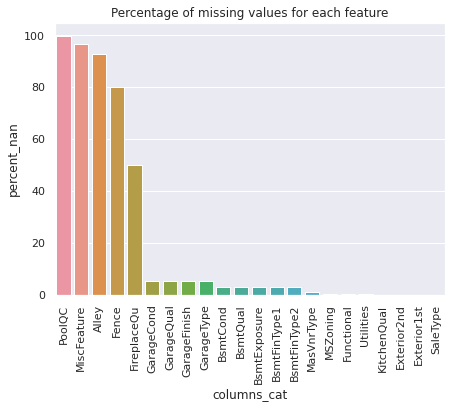

In [28]:
# Building a dataframe for featues with missing values
cols_test_cat = []
percent_nan_test_cat = []

for i in col_nan_test_cat:
    cols_test_cat.append(i)
    percent_nan_test_cat.append(round(df_test_cat[i].isnull().sum() * 100 /\
                       len(df_test_cat),2))

missing_df_test_cat = pd.DataFrame(np.array(cols_test_cat),\
                                columns=["columns_cat"])
missing_df_test_cat['percent_nan'] = np.array(percent_nan_test_cat)

print(missing_df_test_cat)

# Visualizing the NaN values
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_test_cat,\
            x='columns_cat', y = 'percent_nan',\
            order=missing_df_test_cat.sort_values('percent_nan',ascending=False).columns_cat)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation = 90)
plt.show()

In [29]:
# Dropping features with high percentage of missing values
df_train_cat = df_train_cat.drop(['PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu'], axis=1) 
df_test_cat = df_test_cat.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)
# Check the number of columns after dropping
print(df_train_cat.shape)
print(df_test_cat.shape)

(1460, 38)
(1459, 38)


In [30]:
# Filling the missing values with the mode value in each feature
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
# Check if there are any features with missing values
print(df_train_cat.loc[:, df_train_cat.isnull().any()].columns)
print(df_test_cat.loc[:, df_test_cat.isnull().any()].columns)

Index([], dtype='object')
Index([], dtype='object')


**Data Distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

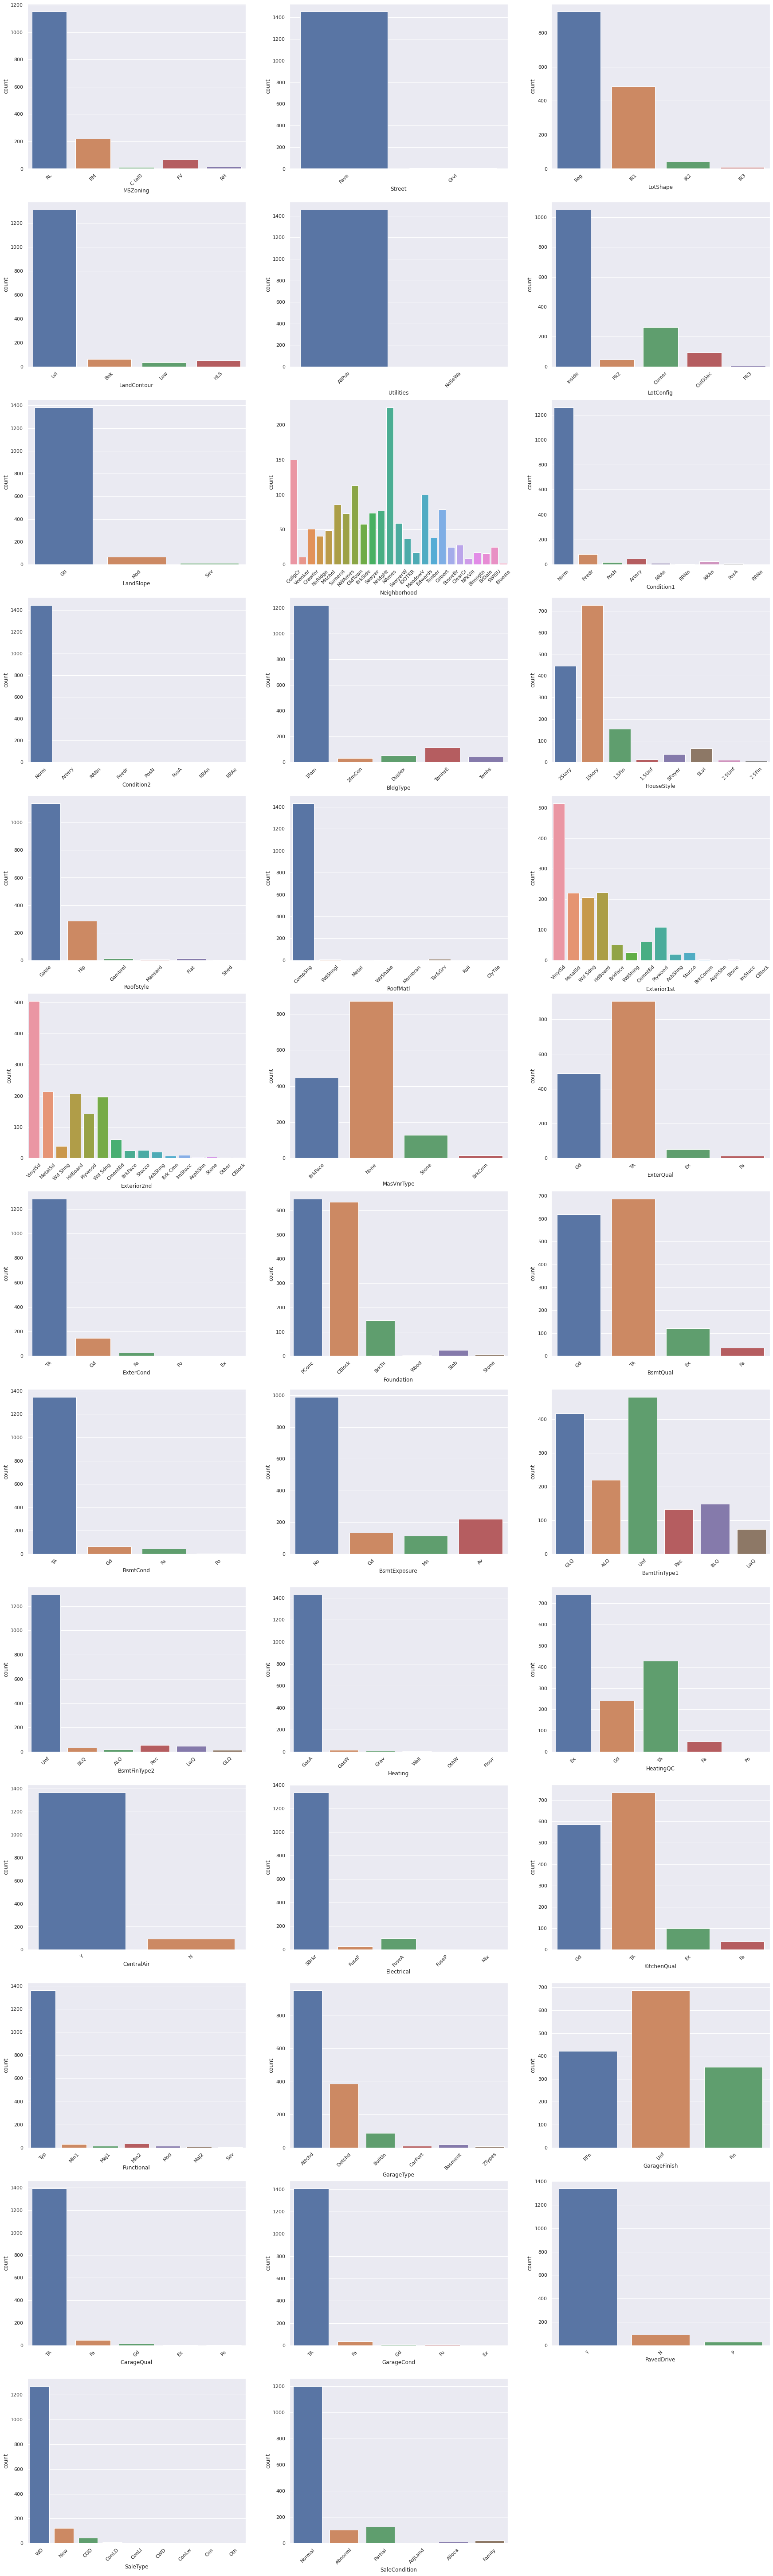

In [31]:
# Figure out the distribution of observations in each feature
count=1
plt.subplots(figsize=(30, 130))
for i in df_train_cat.columns:
    plt.subplot(16,3,count)
    sns.countplot(df_train_cat[i])
    count+=1

    plt.xticks(rotation = 45)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

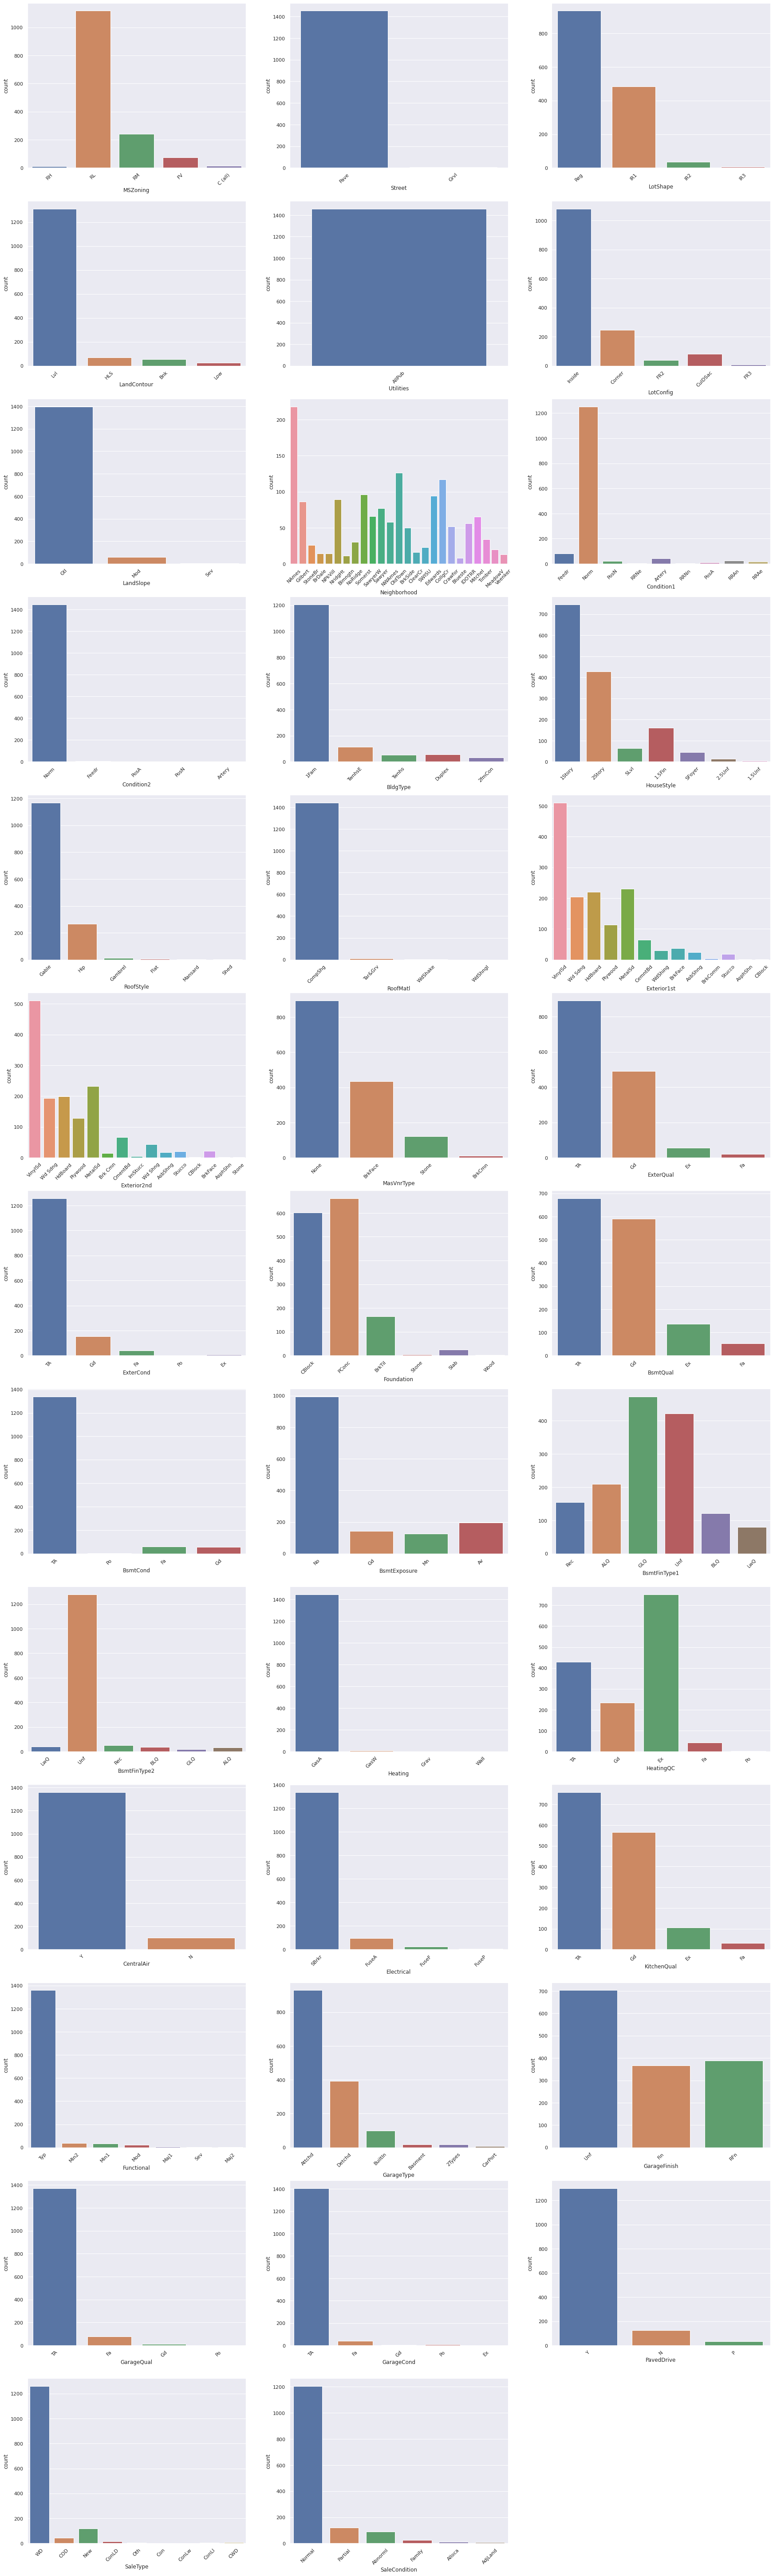

In [32]:
# Figure out the distribution of observations in each feature
count=1
plt.subplots(figsize=(30, 130))
for i in df_test_cat.columns:
    plt.subplot(16,3,count)
    sns.countplot(df_test_cat[i])
    count+=1

    plt.xticks(rotation = 45)
plt.show()

In [33]:
# Get the percentage of each value for each feature
for i in df_train_cat.columns:
    print(df_train_cat.value_counts(i, normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
dtype: float64
Street
Pave    0.99589
Grvl    0.00411
dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU    

In [34]:
# Get the percentage of each value for each feature (test set)
for i in df_test_cat.columns:
    print(df_test_cat.value_counts(i, normalize=True))

MSZoning
RL         0.766278
RM         0.165867
FV         0.050720
C (all)    0.010281
RH         0.006854
dtype: float64
Street
Pave    0.995888
Grvl    0.004112
dtype: float64
LotShape
Reg    0.640164
IR1    0.331734
IR2    0.023989
IR3    0.004112
dtype: float64
LandContour
Lvl    0.898561
HLS    0.047978
Bnk    0.037012
Low    0.016450
dtype: float64
Utilities
AllPub    1.0
dtype: float64
LotConfig
Inside     0.740918
Corner     0.169979
CulDSac    0.056203
FR2        0.026045
FR3        0.006854
dtype: float64
LandSlope
Gtl    0.956820
Mod    0.041124
Sev    0.002056
dtype: float64
Neighborhood
NAmes      0.149417
OldTown    0.086361
CollgCr    0.080192
Somerst    0.065798
Edwards    0.064428
NridgHt    0.061001
Gilbert    0.058944
Sawyer     0.052776
SawyerW    0.045236
Mitchel    0.044551
NWAmes     0.039753
IDOTRR     0.038382
Crawfor    0.035641
BrkSide    0.034270
Timber     0.023304
NoRidge    0.020562
StoneBr    0.017820
SWISU      0.015764
MeadowV    0.013708
ClearCr    

In [35]:
# Features to be dropped
drop_list = ['Street','Utilities', 'LandSlope', 'Condition2',\
             'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir',\
            'Electrical', 'Functional', 'GarageQual',\
             'GarageCond','PavedDrive']
# Drop the quasi constant columns
df_train_cat = df_train_cat.drop(drop_list, axis=1)
df_test_cat = df_test_cat.drop(drop_list, axis=1)

In [36]:
# Check the number of columns after dropping
print(df_train_cat.shape)
print(df_test_cat.shape)

(1460, 25)
(1459, 25)


**Distribution of feature vs target**

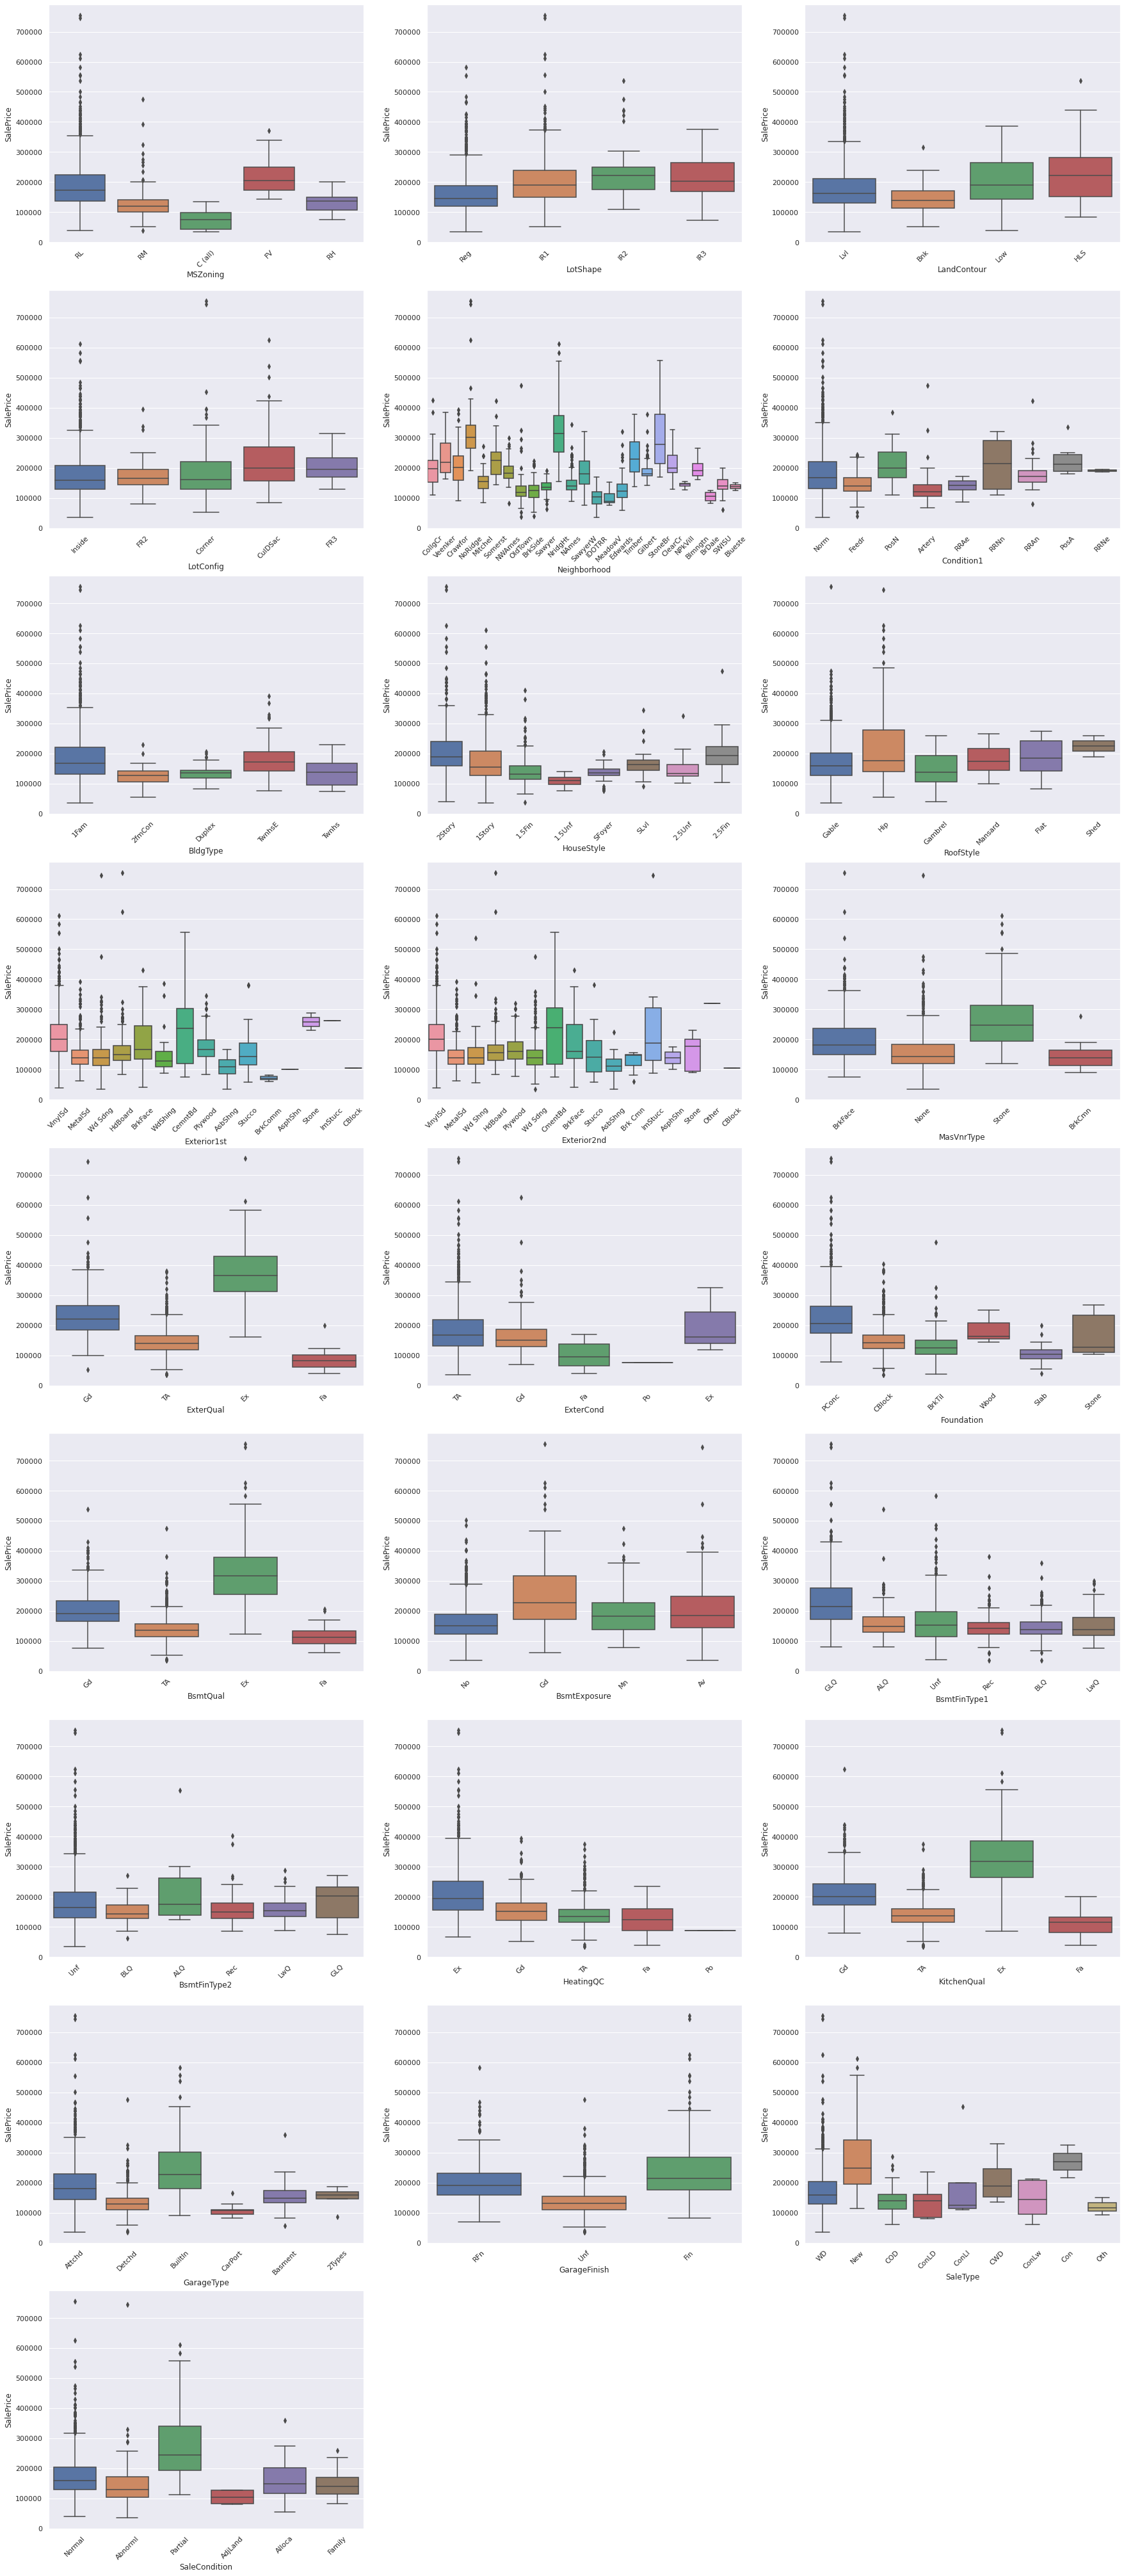

In [37]:
# Appending the target variable to the categorical set
df_train_cat = df_train_cat.join(train['SalePrice'])

# Figure out the distribution of observations in each feature
count=1
plt.subplots(figsize=(30, 130))
for i in df_test_cat.columns:
    plt.subplot(16,3,count)
    sns.boxplot(data = df_train_cat, x = i, y = 'SalePrice')
    count+=1

    plt.xticks(rotation = 45)
plt.show()

Check for Independence using Chi-squre test

In [38]:
# Importing the necessary libraries
import researchpy as rp
import scipy.stats as stats

# Check the relationship between `Exterior1st` and `Exterior2nd`
crosstab_1, test_results_1, expected_1 = rp.crosstab(df_train_cat['Exterior1st'],\
                                                     df_train_cat['Exterior2nd'],\
                                                     test= 'chi-square',\
                                                     expected_freqs= True,\
                                                     prop= 'cell')

# Check the relationship between `ExterQual` and `BsmtQual`
crosstab_2, test_results_2, expected_2 = rp.crosstab(df_train_cat['ExterQual'],\
                                                     df_train_cat['BsmtQual'],\
                                                     test= 'chi-square',\
                                                     expected_freqs= True,\
                                                     prop= 'cell')

# Check the relationship between `ExterQual` and `KitchenQual`
crosstab_3, test_results_3, expected_3 = rp.crosstab(df_train_cat['ExterQual'],\
                                                     df_train_cat['KitchenQual'],\
                                                     test= 'chi-square',\
                                                     expected_freqs= True,\
                                                     prop= 'cell')
print(f'The test results for Exterior1st and Exterior2nd are:\n{test_results_1}\n')
print(f'The test results for ExterQual and BsmtQual are:\n{test_results_2}\n')
print(f'The test results for ExterQual and KitchenQual are:\n{test_results_3}')

The test results for Exterior1st and Exterior2nd are:
                  Chi-square test     results
0  Pearson Chi-square ( 210.0) =   11868.6784
1                      p-value =       0.0000
2                   Cramer's V =       0.7620

The test results for ExterQual and BsmtQual are:
                Chi-square test   results
0  Pearson Chi-square ( 9.0) =   948.4542
1                    p-value =     0.0000
2                 Cramer's V =     0.4653

The test results for ExterQual and KitchenQual are:
                Chi-square test    results
0  Pearson Chi-square ( 9.0) =   1312.2513
1                    p-value =      0.0000
2                 Cramer's V =      0.5474


In [39]:
# Features to be dropped
to_drop = ['Exterior2nd', 'BsmtQual', 'KitchenQual']

df_train_cat.drop(to_drop, axis=1, inplace=True)
df_test_cat.drop(to_drop, axis=1, inplace=True)

# Get the final shape of the categorical features
print(f'The number of features in the training dataset are:{df_train_cat.shape[1]}')
print(f'The number of features in the testing dataset are:{df_test_cat.shape[1]}')

The number of features in the training dataset are:23
The number of features in the testing dataset are:22


**Applying One Hot Encoding**

In [40]:
# Dropping the target variable from the training set
df_train_cat.drop('SalePrice', axis=1, inplace=True)
# Apply one-hot label encoding to get binary features instead of objects
df_train_dumm = pd.get_dummies(df_train_cat)
df_train_dumm.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
# Applying the same process on the test set
df_test_dumm = pd.get_dummies(df_test_cat)
df_test_dumm.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
# Figure out the features that are present in the trainig set and not in testing set
train_features = [x for x in df_train_dumm.columns if x not in\
                    df_test_dumm.columns]
print(f'The features that are present in train dataset and not in\
 test dataset are: {train_features}')

# Figure out the features that are present in the testing set and not in training set
test_features = [x for x in df_test_dumm.columns if x not in\
                    df_train_dumm.columns]
print(f'The features that are present in test dataset and not in\
 train dataset are: {test_features}')

# Dropping the excess columns
df_train_dumm.drop(train_features, axis=1, inplace=True)

print(f'The number of features in the training dataset are:{df_train_dumm.shape[1]}')
print(f'The number of features in the testing dataset are:{df_test_dumm.shape[1]}')

The features that are present in train dataset and not in test dataset are: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']
The features that are present in test dataset and not in train dataset are: []
The number of features in the training dataset are:147
The number of features in the testing dataset are:147


**Feature Engineering**
Initiating new features

In [43]:
# Creating `UnitAge` feature
df_train_impute['UnitAge'] = df_train_impute['YearBuilt'].max() - df_train_impute['YearBuilt']  
df_test_impute['UnitAge'] = df_test_impute['YearBuilt'].max() - df_test_impute['YearBuilt']
# Dropping `YearBuilt` feature
df_train_impute.drop('YearBuilt', axis=1, inplace=True)
df_test_impute.drop('YearBuilt', axis=1, inplace=True)

In [44]:
# Creating `ModificAge` feature
df_train_impute['ModificAge'] = df_train_impute['YearRemodAdd'].max() - df_train_impute['YearRemodAdd']  
df_test_impute['ModificAge'] = df_test_impute['YearRemodAdd'].max() - df_test_impute['YearRemodAdd']
# Dropping `YearRemodAdd` feature
df_train_impute.drop('YearRemodAdd', axis=1, inplace=True)
df_test_impute.drop('YearRemodAdd', axis=1, inplace=True)

Log transformation for skewed data

In [45]:
# Get a glimpse of the skeweness of each numerical feature
for i in df_train_impute.columns:
    print(f'{i}: {df_train_impute[i].skew()}')

OverallQual: 0.2169439277628693
GrLivArea: 1.3665603560164552
LotArea: 12.207687851233496
BsmtFinSF1: 1.685503071910789
BsmtUnfSF: 0.9202684528039037
2ndFlrSF: 0.8130298163023265
BsmtFullBath: 0.596066609663168
HalfBath: 0.675897448233722
BedroomAbvGr: 0.21179009627507137
WoodDeckSF: 1.5413757571931312
OpenPorchSF: 2.3643417403694404
ScreenPorch: 4.122213743143115
MasVnrArea: 2.6776164510820997
TotalBsmtSF: 1.5242545490627664
FullBath: 0.036561558402727165
Fireplaces: 0.6495651830548841
GarageCars: -0.3425489297486655
SalePrice: 1.8828757597682129
UnitAge: 0.6134611724881861
ModificAge: 0.5035620027004843


In [46]:
# Make an empty list to append the skewed features
skewed = []
# Get the highly skewed features
for i in df_train_impute.columns:
    if abs(df_train_impute[i].skew()) > 0.5:
        skewed.append(i)
print(skewed)

['GrLivArea', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MasVnrArea', 'TotalBsmtSF', 'Fireplaces', 'SalePrice', 'UnitAge', 'ModificAge']


In [47]:
# Removing `SalePrice` from the skewed set
skewed.remove('SalePrice')
# Make a copy from the old dataset to apply transformation on
df_train_logged = df_train_impute.copy()
df_test_logged =  df_test_impute.copy()
# Applying log transformation
df_train_logged[skewed] = df_train_impute[skewed].apply(lambda x: np.log(x+1))
df_test_logged[skewed] = df_test_impute[skewed].apply(lambda x: np.log(x+1))

In [48]:
# Now log transform `SalePrice` feature seperately
df_train_logged['SalePrice'] = np.log(df_train_logged['SalePrice'])

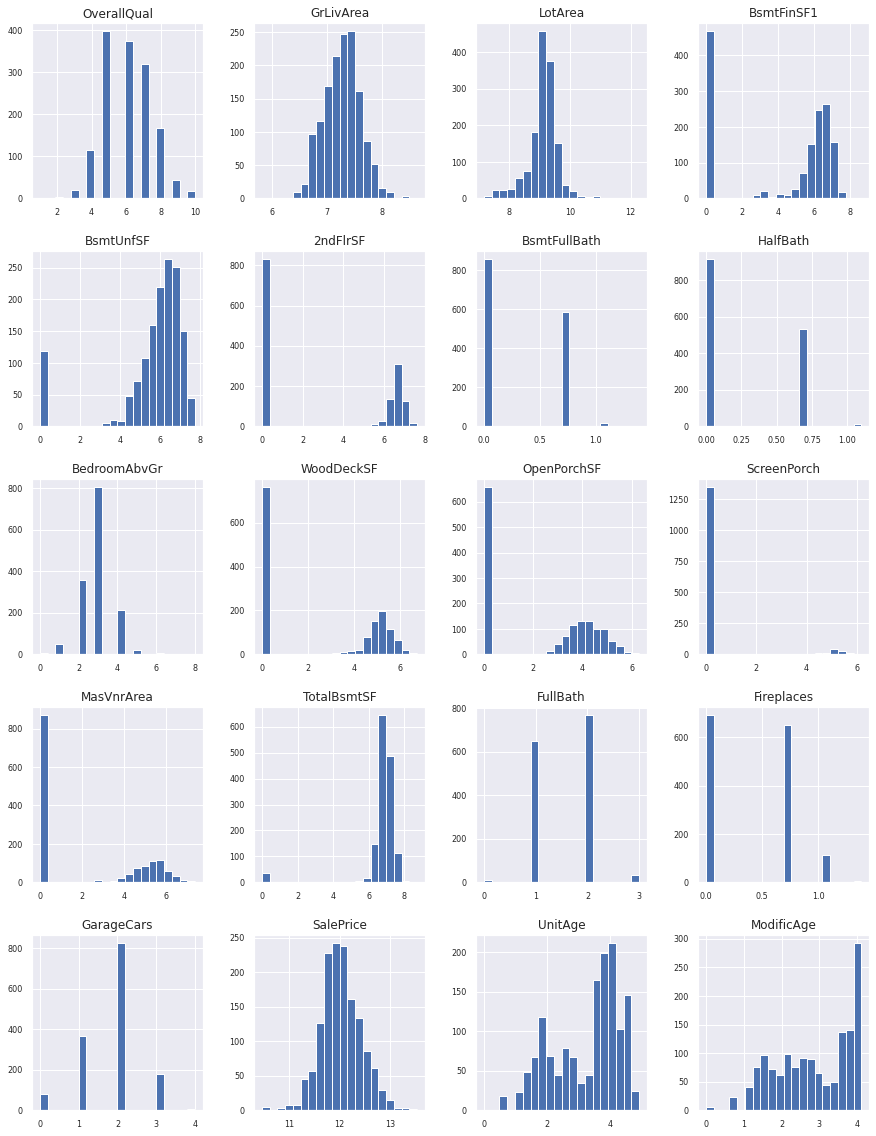

In [49]:
# Plotting the feature distribution after log transformation
df_train_logged.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

In [50]:
# Merging both dataframes
df_train_merge = pd.concat([df_train_logged, df_train_dumm], axis = 1)
df_test_merge = pd.concat([df_test_logged, df_test_dumm], axis = 1)

print(f'Train dataset shape: {df_train_merge.shape}')
print(f'Test dataset shape: {df_test_merge.shape}')

Train dataset shape: (1460, 167)
Test dataset shape: (1459, 166)


# Data Preperation before Modelling

In [51]:
# Store the predictors in X and target feature in y
X = df_train_merge[[x for x in df_train_merge.columns if x != 'SalePrice']]
y = df_train_merge['SalePrice']
# Get the shape of X and y
print(X.shape, y.shape)

(1460, 166) (1460,)


**Standardizing Data**

In [52]:
# importing the necessary library
from sklearn.preprocessing import StandardScaler
# Standardizing data
std_scaler = StandardScaler().fit(X)
X_transform = std_scaler.transform(X)
# Applying standardization on the testing set
df_test_transform = std_scaler.transform(df_test_merge)

In [53]:
# Changing the resulted arrays of the above operations to dataframes
X_transform = pd.DataFrame(X_transform, columns=X.columns)
df_test_transform = pd.DataFrame(df_test_transform, columns = df_test_merge.columns)

y = pd.DataFrame(y).reset_index().drop('index', axis=1)

**Backward stepwise regression**

Stepwise Regression is an iterative construction of a regresison model that involves selecting the independent variables based on certain criteria such as the how much it increases (or decreases) the R-squared if it is added (or removed) to or from the model.
Here we will depend on Backward Stepwise Regression, which starts with a complete model and then eliminating the indpendent variables one by one and if they are statistically significant or not.

In [54]:
# Importing library to apply OLS regression model
import statsmodels.api as sm

selected_features = []

def backward_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """ 
    Perform a backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X: predictors
            y: target
            initial_list: column names of X
            threshold_in: include a feature if its p-value < threshold_in
            threshold_out: exclude a feature if its p-value > threshold_out
            verbose: whether to print the sequence of inclusions and exclusions
        
        Returns: list of selected features
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {} with p-value {}:'.format(worst_feature, worst_pval))
        if not changed:
            break
    selected_features.append(included)
    print(f'\nSelected Features:\n{selected_features[0]}')

backward_selection(X_transform, y)

Drop SaleType_Con with p-value 0.9860006966082173:
Drop Neighborhood_Blueste with p-value 0.9752471652024551:
Drop Neighborhood_Timber with p-value 0.9938685185068996:
Drop Exterior1st_WdShing with p-value 0.9648785106026077:
Drop Exterior1st_HdBoard with p-value 0.9538783094879879:
Drop Neighborhood_CollgCr with p-value 0.9473338816797618:
Drop Neighborhood_SawyerW with p-value 0.9552413012027657:
Drop 2ndFlrSF with p-value 0.9396911728464405:
Drop Condition1_PosA with p-value 0.9399476323605214:
Drop GarageFinish_RFn with p-value 0.9386684825847478:
Drop BsmtFinType2_LwQ with p-value 0.9244962362640594:
Drop BsmtFinType2_Unf with p-value 0.9429552409858957:
Drop Exterior1st_AsphShn with p-value 0.9187246317027447:
Drop Condition1_RRAn with p-value 0.9096379262390719:
Drop LandContour_Low with p-value 0.9032753413927506:
Drop ExterQual_Fa with p-value 0.9021767807804812:
Drop ExterQual_Gd with p-value 0.9777580502400101:
Drop Condition1_RRNe with p-value 0.9019123424136362:
Drop House

In [55]:
# Now using only the slected features in our training and testing sets
X_transform = X_transform[selected_features[0]]
df_test_transform = df_test_transform[selected_features[0]]

Variance Inflation Factor is a tool to measure the severity of multicollinearity problem in a set of features.
Usually, VIF value of 10 or greater is considered a very high value which in turn includes a high multicollinearity with other features.
So, any feature with VIF value of 10 or greater wil be dropped from our model, otherwise, we will keep it.

In [56]:
# Importing library for VIF measurement process
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_transform.columns
vif['VIF Factor'] = [variance_inflation_factor(X_transform.values,i) for i in range(X_transform.shape[1])]
vif

,Feature,VIF Factor
0,OverallQual,3.698390
1,GrLivArea,4.531745
2,LotArea,2.244262
3,BsmtFinSF1,22.724632
4,BsmtFullBath,1.935474
5,HalfBath,2.249900
6,WoodDeckSF,1.301413
7,ScreenPorch,1.110792
8,TotalBsmtSF,1.388186
9,FullBath,2.815773


In [57]:
# Dropping `BsmtFinSF1` and `BsmtFinType1_Unf` columns
X_transform.drop(['BsmtFinSF1','BsmtFinType1_Unf'], axis=1, inplace=True)
df_test_transform.drop(['BsmtFinSF1','BsmtFinType1_Unf'], axis=1, inplace=True)

print(f'The shape of the X_transform dataframe is: {X_transform.shape}')
print(f'The shape of the df_test_transform dataframe is: {df_test_transform.shape}')

The shape of the X_transform dataframe is: (1460, 56)
The shape of the df_test_transform dataframe is: (1459, 56)


**Splitting Data**

In [58]:
# Importing the necessary library
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testin set
X_train, X_test, y_train, y_test = train_test_split(X_transform, y,\
                                                    test_size=0.2,\
                                                    shuffle=True,
                                                    random_state=1)

In [59]:
# Importing model evauluation metrics
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
def model_performance(model, test, pred):
    """ 
    Measuring each model RMSE and R-Squared 
        Arguments:
            model: The model that we aim to evaluate its performance
            y_test: test_data
            y_pred: predicted_data from the model
        
        Returns:
            print algorithm name
            print RMSE
            Print R-Squared     
    """
    RMSE = np.sqrt(mean_squared_error(test, pred))    
    R_Squared = r2_score(test, pred)
    
    
    print(f'Algorithm: {model}\n')
    print(f'Root Mean Squared Error: {RMSE}\n')
    print(f'Coefficient of Determination: {R_Squared}')

**Linear Regression**

In [61]:
# Importing linear regression library
from sklearn.linear_model import LinearRegression
# Initiating the linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_preds_lin = lin_model.predict(X_test)
model_performance("Linear Model", y_test, y_preds_lin)

Algorithm: Linear Model

Root Mean Squared Error: 0.1314773782177152

Coefficient of Determination: 0.9003990744615393


In [62]:
# Importing the cross validation library
from sklearn.model_selection import cross_val_score
# Applying cross validation on the dataset
model_lin_r2_cross = cross_val_score(lin_model, X_transform, y, scoring = 'r2')
model_lin_rmse_cross = cross_val_score(lin_model, X_transform, y, scoring = 'neg_root_mean_squared_error')
print(f'R_Squared using cross validation: {np.mean(model_lin_r2_cross)}')
print(f'RMSE using cross validation: {-1 * (np.mean(model_lin_rmse_cross))}')

R_Squared using cross validation: 0.8911873528479438
RMSE using cross validation: 0.13111779633824674


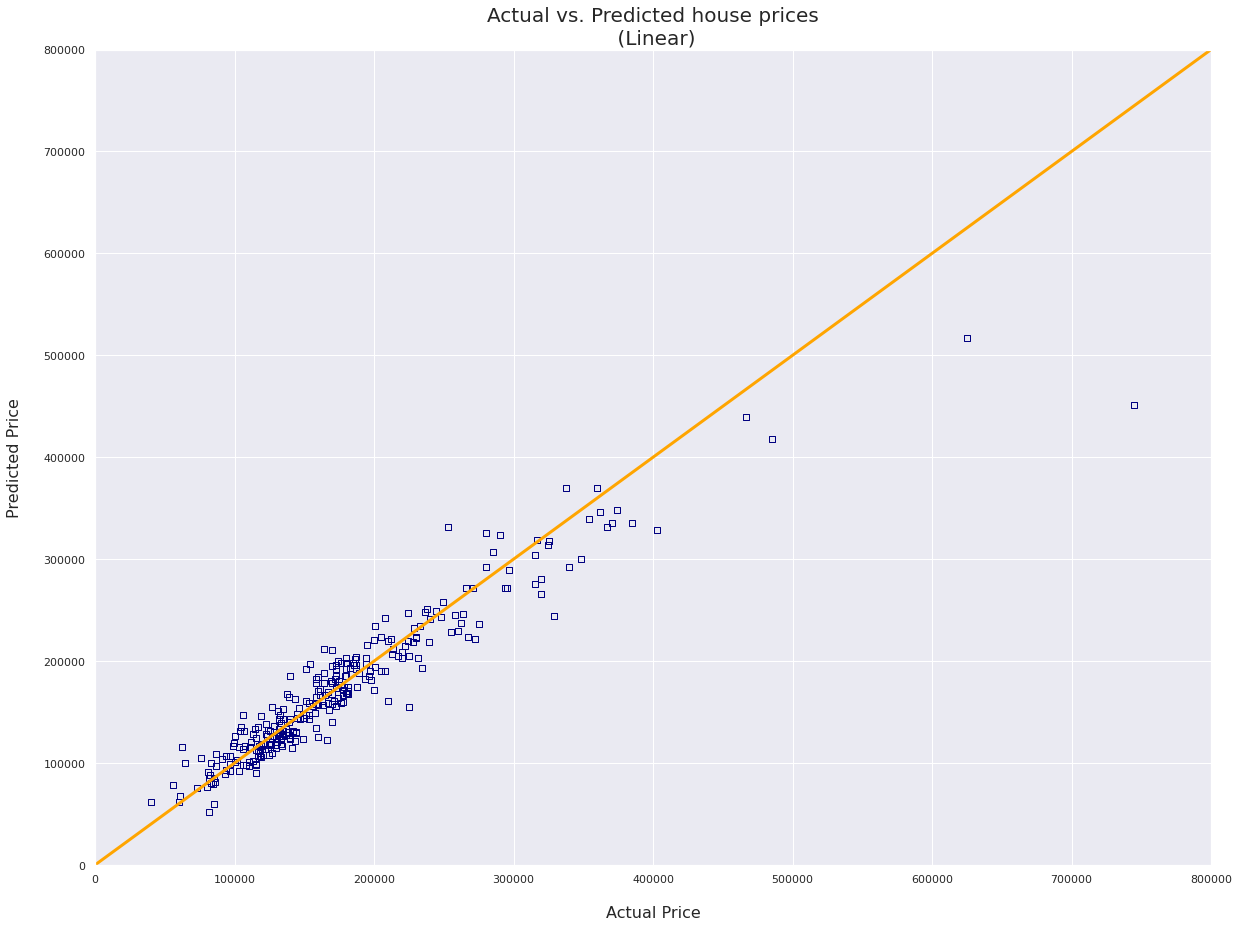

In [63]:
# Plotting the relationship between actual and perdicted prices for linear model
plt.figure(figsize=(20,15))
plt.scatter(np.exp(y_test), np.exp(y_preds_lin),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [64]:
# Empty lists to store the results of the linear model in lists
algorithms = []
R_squared = []
RMSE = []
# Adding the results of the linear model
algorithms.append(lin_model.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_lin),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_lin)),4))

**Lasso Regression**

In [65]:
# Importing Lasso regression library
from sklearn.linear_model import Lasso
# Initiaiting lasso regression model
lass_model = Lasso(alpha=0.001)
lass_model.fit(X_train, y_train)
y_preds_lass = lass_model.predict(X_test)
model_performance("Lasso Model", y_test, y_preds_lass)

Algorithm: Lasso Model

Root Mean Squared Error: 0.13161503818449324

Coefficient of Determination: 0.9001903961597515


In [66]:
# Applying cross validation on the dataset
model_lass_r2_cross = cross_val_score(lass_model, X_transform, y, scoring = 'r2')
model_lass_rmse_cross = cross_val_score(lass_model, X_transform, y, scoring = 'neg_root_mean_squared_error')
print(f'R_Squared using cross validation: {np.mean(model_lass_r2_cross)}')
print(f'RMSE using cross validation: {-1 * (np.mean(model_lass_rmse_cross))}')

R_Squared using cross validation: 0.8915628793563375
RMSE using cross validation: 0.1309045569570369


**Hyperparameter Tuning**

In [67]:
# Importing GridSearchCV library
from sklearn.model_selection import GridSearchCV
# Tuning the lasso model
# Choosing from different values of alphas
alphas = list(np.logspace(-5, 1, 50))
params = {'alpha': alphas}
lass_grid = GridSearchCV(Lasso(), params, scoring='r2', verbose=1)

lass_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {lass_grid.best_score_}')
print(f'Best alpha for the optimized model: {lass_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R-Squared for the optimized model: 0.8914812309957394
Best alpha for the optimized model: {'alpha': 0.00022229964825261955}


In [68]:
# Building optimized Lasso Model
lass_model_tune = Lasso(alpha = lass_grid.best_params_['alpha'])
lass_model_tune.fit(X_train, y_train)
y_preds_lass_tune = lass_model_tune.predict(X_test)
model_performance("Lasso Model Optimized", y_test, y_preds_lass_tune)

Algorithm: Lasso Model Optimized

Root Mean Squared Error: 0.13147333304479664

Coefficient of Determination: 0.9004052032233696


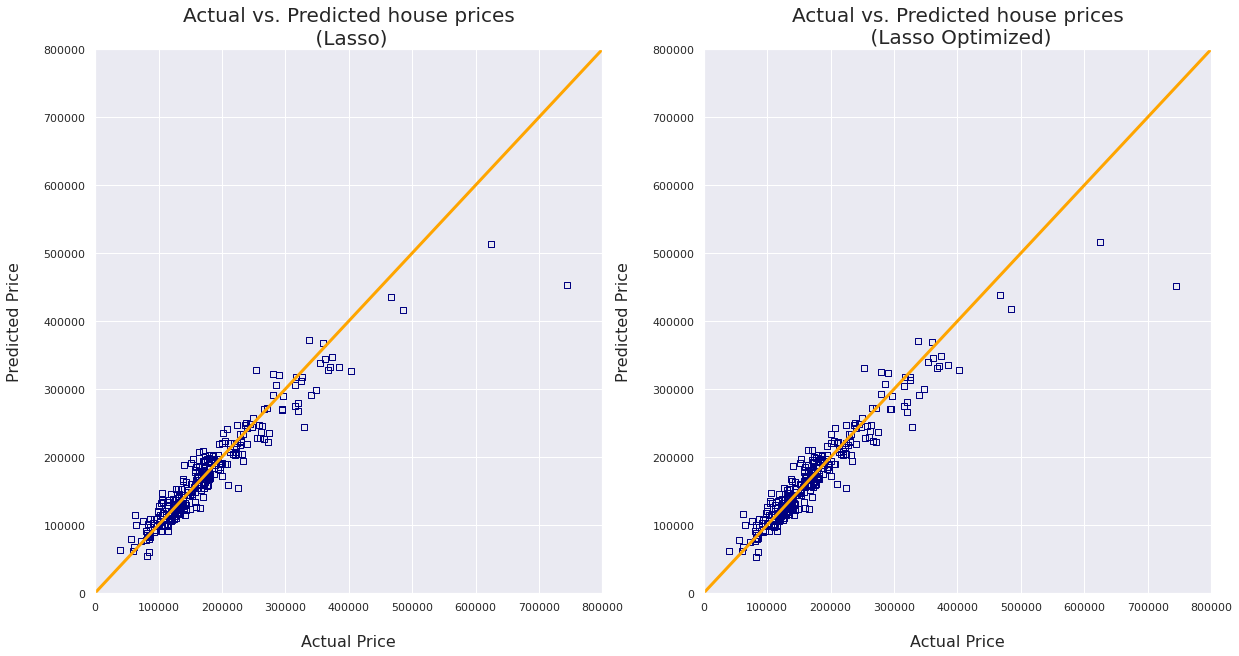

In [69]:
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(y_test), np.exp(y_preds_lass),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(y_test), np.exp(y_preds_lass_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Lasso Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

In [70]:
# Adding the results of the lasso model
algorithms.append(lass_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_lass_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_lass_tune)),4))

**XGB Regression**

In [71]:
# Importing Ridge regression library
from xgboost import XGBRegressor
# Initiaiting lasso regression model
xgb_model = XGBRegressor(random_state=4)
xgb_model.fit(X_train, y_train)
y_preds_xgb = xgb_model.predict(X_test)
model_performance("XGB Model", y_test, y_preds_xgb)

Algorithm: XGB Model

Root Mean Squared Error: 0.13769784569898064

Coefficient of Determination: 0.8907514717555368


In [72]:
# Tuning the XGB model
# Choosing from different values of estimators
n_est = [100, 200, 500, 600]
# Choosing from different values of learning rates
learn_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]

colsample_bytree = [0.3, 0.5, 0.8]

params = {'n_estimators': n_est,
         'learning_rate': learn_rate,
         'colsample_bytree':colsample_bytree}
xgb_grid = GridSearchCV(XGBRegressor(), params, scoring='r2', verbose=1)

xgb_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {xgb_grid.best_score_}')
print(f'Best number of estimators and learning rate for the optimized model: {xgb_grid.best_params_}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
R-Squared for the optimized model: 0.8898132391026443
Best number of estimators and learning rate for the optimized model: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'n_estimators': 600}


In [73]:
# Building optimized XGB Regression Model
xgb_model_tune = XGBRegressor(n_estimators = xgb_grid.best_params_['n_estimators'],\
                              learning_rate = xgb_grid.best_params_['learning_rate'], random_state=4)
xgb_model_tune.fit(X_train, y_train)
y_preds_xgb_tune = xgb_model_tune.predict(X_test)
model_performance("XGB Model Optimized", y_test, y_preds_xgb_tune)

Algorithm: XGB Model Optimized

Root Mean Squared Error: 0.13708087147634698

Coefficient of Determination: 0.8917282847193283


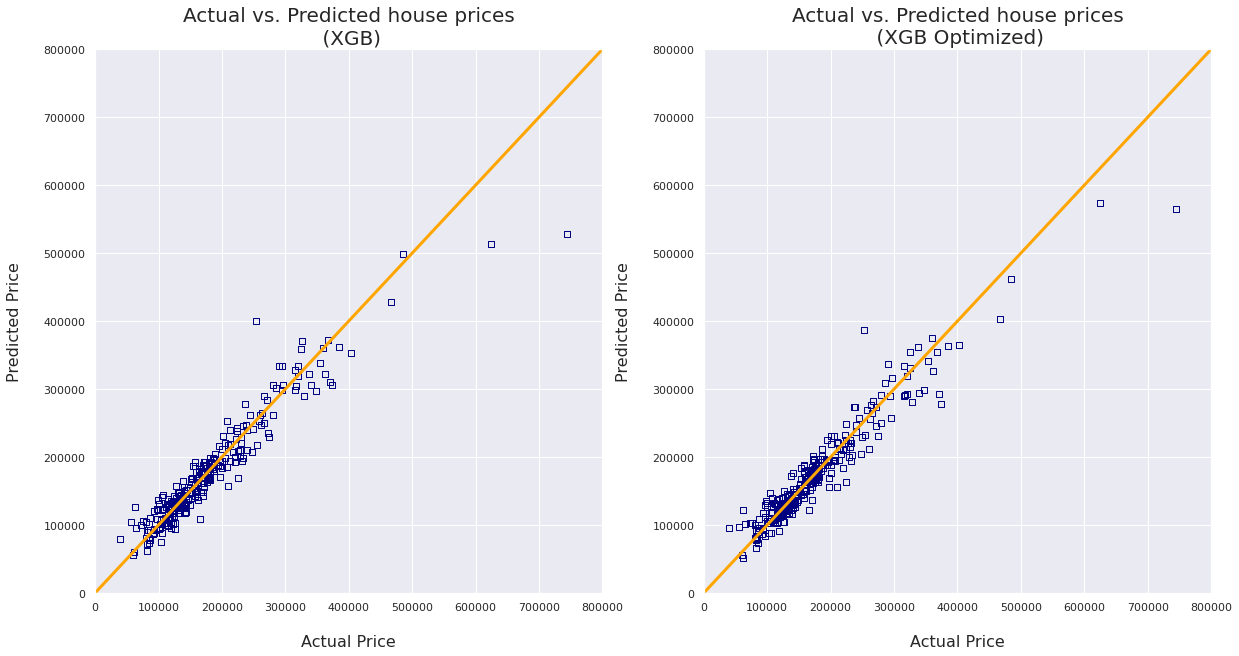

In [74]:
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(y_test), np.exp(y_preds_xgb),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (XGB)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(y_test), np.exp(y_preds_xgb_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (XGB Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

In [75]:
# Adding the results of the XGB model
algorithms.append(xgb_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_xgb_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_xgb_tune)),4))

**Ridge Regression**

In [76]:
# Importing Ridge regression library
from sklearn.linear_model import Ridge
# Initiaiting lasso regression model
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
y_preds_ridge = ridge_model.predict(X_test)
model_performance("Ridge Model", y_test, y_preds_ridge)

Algorithm: Ridge Model

Root Mean Squared Error: 0.1314773703563273

Coefficient of Determination: 0.9003990863723562


In [77]:
# Tuning the ridge model
# Choosing from different values of alphas
alphas = list(np.logspace(-5, 1, 50))
params = {'alpha': alphas}
ridge_grid = GridSearchCV(Ridge(), params, scoring='r2', verbose=1)

ridge_grid.fit(X_train, y_train)

print(f'R-Squared for the optimized model: {ridge_grid.best_score_}')
print(f'Best alpha for the optimized model: {ridge_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R-Squared for the optimized model: 0.89163292171107
Best alpha for the optimized model: {'alpha': 10.0}


In [78]:
# Building optimized Ridge Model
ridge_model_tune = Ridge(alpha = ridge_grid.best_params_['alpha'])
ridge_model_tune.fit(X_train, y_train)
y_preds_ridge_tune = ridge_model_tune.predict(X_test)
model_performance("Ridge Model Optimized", y_test, y_preds_ridge_tune)

Algorithm: Ridge Model Optimized

Root Mean Squared Error: 0.13142565143150411

Coefficient of Determination: 0.9004774304856081


In [79]:
# Adding the results of the Ridge model
algorithms.append(ridge_model_tune.__class__.__name__)
R_squared.append(round(r2_score(y_test, y_preds_ridge_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(y_test, y_preds_ridge_tune)),4))

In [80]:
# Demonstrating final results for each model
final_results = pd.DataFrame({'Algorithm': algorithms,\
                            'R_squared': R_squared,\
                            'RMSE': RMSE})
final_results

,Algorithm,R_squared,RMSE
0,LinearRegression,0.9004,0.1315
1,Lasso,0.9004,0.1315
2,XGBRegressor,0.8917,0.1371
3,Ridge,0.9005,0.1314


In [81]:
# Predicting house prices for the test data
y_pred_test = np.exp(ridge_model_tune.predict(df_test_transform))
output = pd.DataFrame({'Id': id_column,\
                       'SalePrice': np.round(y_pred_test.reshape(1459,).tolist())})
output.head()

,Id,SalePrice
0,1461,114524.0
1,1462,145296.0
2,1463,173368.0
3,1464,183288.0
4,1465,211467.0


In [82]:
output.to_csv('submission.csv', index=False)